# Client scoring
# Author: Adrian Żelazek

# Table of contents
1. Libraries<br>
2. Dataset<br>
3. Data preparation<br>
>3.1 Removing of unneccessary columns<br>
>3.2 Data types<br>
>3.3 Duplicates<br>
>3.4 Missing values<br>
>3.5 Outliers - Boxplots, Isolation Forest<br>
4. Exploratory Data Analysis (EDA) & Features Engineering<br>
>4.1 Pandas Profiling and Sweetviz reports<br>
>4.2 EDA - target (y)<br>
>4.3 EDA & FE - age<br>
>4.4 EDA & FE - job<br>
>4.5 EDA & FE - education<br>
>4.6 EDA - categorical variables (after Features Engineering)<br>
>4.7 EDA - numerical variables (after Features Engineering)<br>
5. Dummy coding<br>
6. CORR analysis<br>
>6.1 Correlation between target and independent variables<br>
>6.2 Correlation between independent variables<br>
7. Features selection - Forward method<br>
8. Build function to accelerate modelling<br>
>8.1 Confusion matrix - function<br>
>8.2 Classification report - function<br>
>8.3 Comparision of statistics on training and test datasets - function<br>
>8.4 ROC curves for training and test datasets - function<br>
>8.5 COmparision of ROC curves and AUC metrics for training and test datasets - function<br>
9. Decision Tree - ML model<br>
>9.1 Tuning of hyper parameteres - loop<br>
>9.2 Tuning of parameters train_test_split - loop<br>
>9.3 Model building<br>
>9.4 Model evaluation<br>
10. XGBoost - ML model<br>
>10.1 Tuning of hyper parameters - loop<br>
>10.2 Tuning of parameters train_test_split - loop<br>
>10.3 Model bulding<br>
>10.4 Model evaluation<br>
11. Comparision of models - XGBoost and Decision Tree<br>
>11.1 Data Frame with statistics of both models<br>
>11.2 ROC curves with AUC metrics of both models<br>
12. Probabilities<br>
13. Conclusions<br>


**Target variable:**<br>
1 - client bought subscription<br>
0 - client does not bought subscription<br>

**Problem description:**<br>
Build, evaluate and compare classification models to choose the best model to target clients to campaign.<br>

**Programming language:**<br>
Python<br>

**Libraries:**<br>
Scikit-learn, SciPy, Statsmodels, Pandas, NumPy, Matplotlib, Seaborn, Scikitplot, yellowbrick, xgboost<br>

**Algorithms:**<br>
Isolation Forest, dummy coding, Spearman corr, Forward features selection method<br>

**Models built:**<br>
Decision Tree, XGBoost<br>

**Methods of model evaluation**<br>
Confusion matrix, classification report, Accuracy, Precision, Recall, F1, AUC, Gini, ROC, PROFIT, LIFT, comparision of statistics on train and test datasets

**WARNING!**<br>
Because of small dataset results coudl be overfitted. Regardless of the algorithms used, the more important thing is the data, and more specifically the quality and quantity of the data, which is not necessarily possible with data only for learning.

# 1. Libraries

In [242]:
#Data analysis
import pandas as pd
import numpy as np
import os
import datetime

#EDA reports
import pandas_profiling
import sweetviz as sv

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from pylab import *
import scikitplot as skplt

#ML models
from sklearn.ensemble import IsolationForest
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#Disregard of warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

#Style of plots: "ggplot"
plt.style.use("ggplot")

In [243]:
#Version of Python and libraries
from platform import python_version
import sklearn
print("Python version is {}".format(python_version()))
print("Pandas version is {}".format(pd.__version__))
print("Scikit-learn is {}".format(sklearn.__version__))
print("XGBoost is {}".format(xgb.__version__))
print("Numpy version is {}".format(np.__version__))
print("Matplotlib version is {}".format(matplotlib.__version__))
print("Seaborn version is {}".format(sns.__version__))

Python version is 3.7.4
Pandas version is 1.1.4
Scikit-learn is 0.24.1
XGBoost is 1.3.3
Numpy version is 1.20.1
Matplotlib version is 3.3.3
Seaborn version is 0.11.0


# 2. Dataset

In [246]:
#Path to current working directory (with data source)
print("Current working catalog: {}" .format(os.getcwd()))

Current working catalog: C:\Users\adria\Desktop\Client scoring


In [247]:
#Dataset loading, presentation of the dataset shape, first lines of the dataset
data = pd.read_csv("C:\\Users\\adria\\Desktop\\Client scoring\\clients.csv")

print("Shape of the dataset: {}".format(data.shape))
print("Number of observations: {}".format(data.shape[0]))
print("Number of variables: {}".format(data.shape[1]))
print("Variables: {}".format(data.columns.tolist()))
print("Numeric variables: {}".format(data.select_dtypes(include=["int64", "float64"]).columns.tolist()))
print("Categorical variables: {}".format(data.select_dtypes(include=["object"]).columns.tolist()))
print("Time variables: {}".format(data.select_dtypes(include=["datetime64"]).columns.tolist()))

display(data)

Shape of the dataset: (41188, 21)
Number of observations: 41188
Number of variables: 21
Variables: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
Numeric variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Time variables: []


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


# 3. Data preparation

## 3.1 Removing unnecessary columns

In [24]:
#List of columns in the dataset - at first glance, none of the variables appear to be unnecessary
data.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

## 3.2 Data types

In [25]:
#Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [248]:
#Lists of variables based on data type
print("Numeric variables: {}".format(data.select_dtypes(include=["int64", "float64"]).columns.tolist()))
print("Categorical variables: {}".format(data.select_dtypes(include=["object"]).columns.tolist()))
print("Time variables: {}".format(data.select_dtypes(include=["datetime64"]).columns.tolist()))

Numeric variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Time variables: []


## 3.3 Duplicates

In [27]:
#Finding duplicate observations
data[data.duplicated(data.columns.tolist(), keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
4601,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
8178,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
8988,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
11725,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,1
12041,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
13488,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
17501,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
17954,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
17977,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
19339,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0


In [249]:
#Removing duplicate observations from the dataset
print("Shape of the dataset before removing duplicates: {}".format(data.shape))
pd.DataFrame.drop_duplicates(data, inplace=True)
print("Shape of the dataset after removing duplicates: {}".format(data.shape))

Shape of the dataset before removing duplicates: (41188, 21)
Shape of the dataset after removing duplicates: (41176, 21)


In [29]:
#Search for duplicate observations (to make sure there are none)
data[data.duplicated(data.columns.tolist(), keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


## 3.4 Missing values

In [150]:
#Looking for missing values
braki_df = pd.DataFrame(data.dtypes, columns=["data_type"])
braki_df["is_missing"] = pd.DataFrame(data.isna().any())
braki_df["sum_of_missing"] = pd.DataFrame(data.isna().sum())
braki_df["perc_of_missing"] = round((data.apply(pd.isna).mean()*100),2)
braki_df

,typ_danych,czy_jest_brak,suma_brakow,proc_ilosc_brakow
age,int64,False,0,0.0
job,object,False,0,0.0
marital,object,False,0,0.0
education,object,False,0,0.0
default,object,False,0,0.0
housing,object,False,0,0.0
loan,object,False,0,0.0
contact,object,False,0,0.0
month,object,False,0,0.0
day_of_week,object,False,0,0.0


In [31]:
#Sum of missing values
print("Sum of missing in the dataset: {}".format(data.isna().sum().sum()))
print("Are there missing values?: {}".format(data.isna().any().any()))

Suma braków w zbiorze: 0
Czy są braki?: False


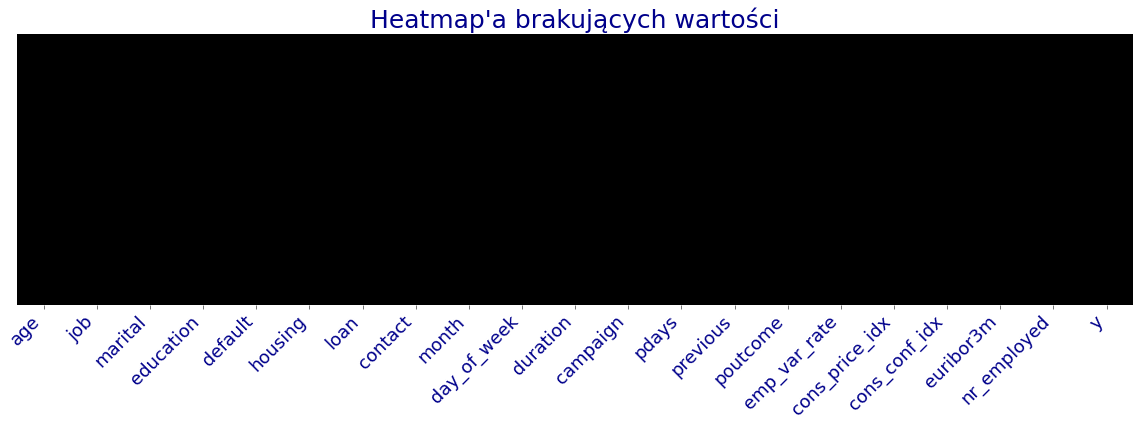

In [32]:
#Heatmap of missing values
#Size of plot
plt.figure(figsize=(20,5))

sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False, 
            cmap="bone").set_title("Heatmap of missing values", 
                                   fontsize = 25,
                                   color = "darkblue")

plt.xticks(rotation=45, fontsize=18, horizontalalignment="right", color="darkblue")
plt.show()

## 3.5 Outliers - boxplots, Isolation Forest

In [250]:
#Data Frame with numerical columns - for boxplotów
df_numeryczne = data.select_dtypes(include=["int64", "float64"])
#List of numerical columns without target variable - for Isolation Forest
columny_numeryczne = [x for x in df_numeryczne.columns.tolist() if x != "y"]

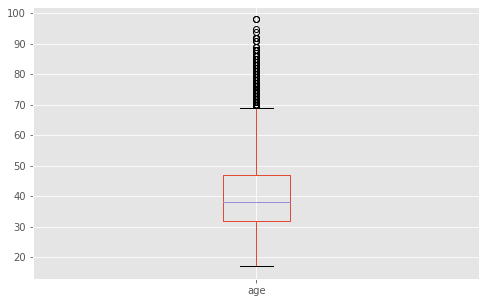

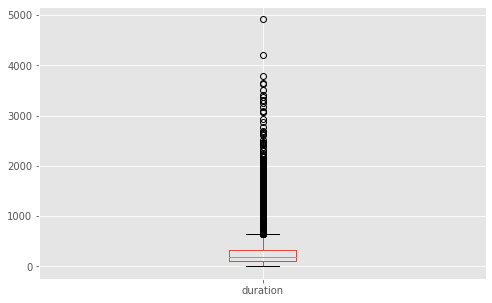

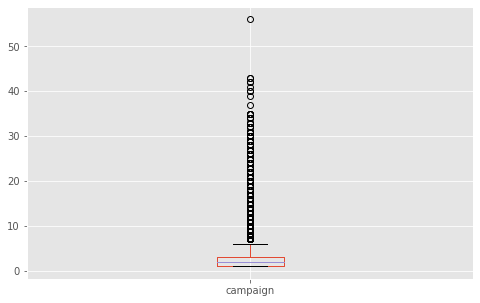

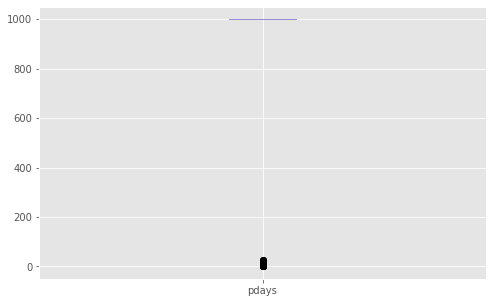

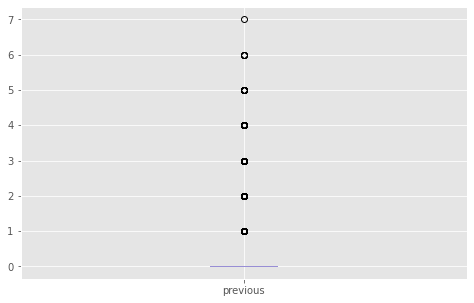

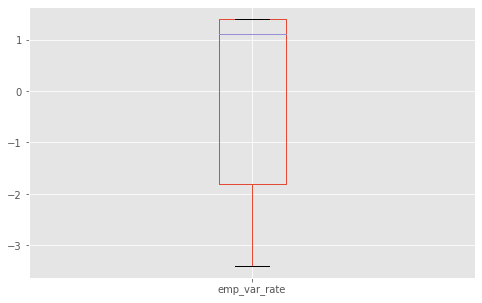

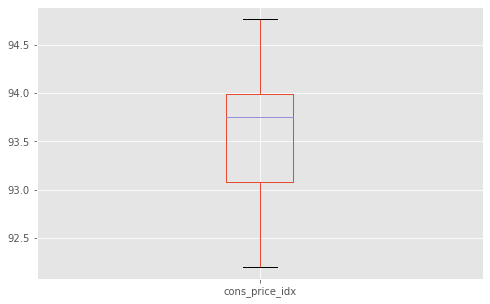

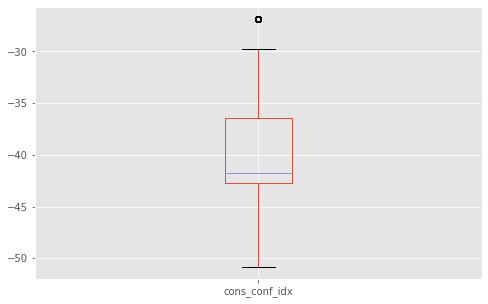

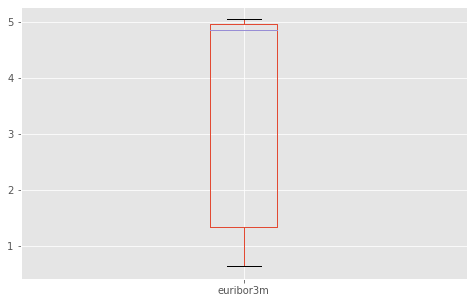

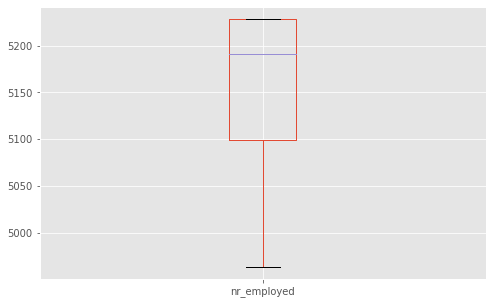

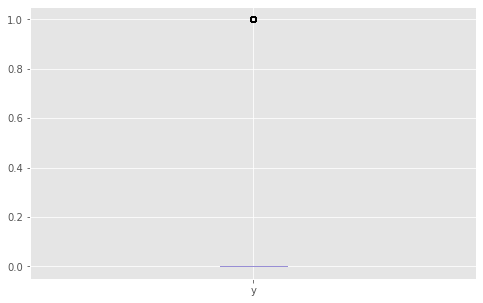

In [34]:
#Boxplots
for column in df_numeryczne:
    ax = plt.figure(figsize=(8,5))
    df_numeryczne.boxplot([column])

In [251]:
#Isolation Forest - Looking for anomalies
model = IsolationForest(n_estimators=50, max_samples='auto', max_features=1.0, contamination = 0.05)
model.fit(data[columny_numeryczne])

#Adding columns with IF results to the dataset
data["scores"] = model.decision_function(data[columny_numeryczne])
data["anomaly"] = model.predict(data[columny_numeryczne])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,scores,anomaly
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0.177662,1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0.140096,1
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,-0.027307,-1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0.167592,1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,-0.029400,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0,0.106785,1
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0,0.186298,1
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.190991,1
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0,0.033255,1


In [252]:
#DataFrame with anomalies
outliers = data.loc[data["anomaly"]== - 1]
#Indexes of observations with anomalies
anomaly_index = outliers.index.tolist()

In [253]:
#Observations with anomalies
outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,scores,anomaly
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,-0.027307,-1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,-0.029400,-1
71,50,management,married,university.degree,no,no,no,cellular,aug,tue,...,1,success,-2.9,92.201,-31.4,0.883,5076.2,0,-0.035702,-1
96,38,admin.,single,high.school,no,yes,no,cellular,apr,thu,...,1,success,-1.8,93.749,-34.6,0.659,5008.7,1,-0.030164,-1
113,34,admin.,divorced,high.school,no,no,no,cellular,nov,tue,...,3,success,-3.4,92.649,-30.1,0.716,5017.5,0,-0.079452,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41078,20,student,single,basic.4y,no,yes,yes,cellular,apr,tue,...,1,success,-1.8,93.749,-34.6,0.644,5008.7,1,-0.062332,-1
41082,23,student,single,high.school,no,yes,no,cellular,oct,thu,...,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,0,-0.017450,-1
41111,30,technician,married,university.degree,no,yes,no,cellular,dec,thu,...,1,success,-3.0,92.713,-33.0,0.720,5023.5,1,-0.019321,-1
41135,64,retired,married,university.degree,no,no,no,cellular,mar,fri,...,2,success,-1.8,93.369,-34.8,0.653,5008.7,0,-0.046848,-1


In [254]:
#Removing values with anomalies from a dataset
data = data[data["anomaly"] != -1]
#Removing columns not needed in further analysis: "scores", "anomaly"
data.drop(columns=["scores", "anomaly"], inplace=True)

# 4. Exploratory Data Analysis (EDA) & Features engineering

## 4.1 Pandas Profiling and Sweetviz reports

In [39]:
#Saving Pandas Profiling Report after data preprocessing and before EDA and FE to HTML
pp_report = pandas_profiling.ProfileReport(data)
pp_report.to_file("EDA_reports/Pandas_Profiling_Raport.html")

#Saving Sweetviz Report after data preprocessing and before EDA and FE to HTML
sweetviz_report = sv.analyze(data)
sweetviz_report.show_html("EDA_reports/Sweetviz_Raport.html")


Report EDA_reports/Sweetviz_Raport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 4.2 EDA - target (y)

In [255]:
#Distribution of target variable
rozklad_target = data["y"].value_counts(normalize=True).round(3).to_frame()*100
rozklad_target["distribution"] = data["y"].value_counts().round(3).to_frame()
rozklad_target.columns=["%", "distribution"]
rozklad_target

,%,distribution
0,91.1,35625
1,8.9,3492


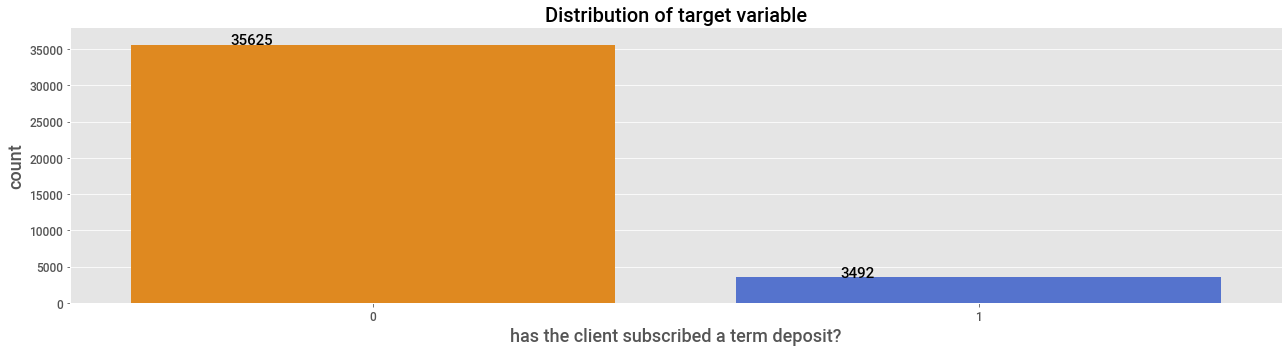

In [256]:
#Size of plot
plt.figure(figsize=(18, 5))
#Parameters of plot
ax=sns.countplot(x="y",
                 data=data,
                 palette = ["darkorange", "royalblue"])
ax.set_title("Distribution of target variable", fontsize=20)
plt.xlabel("has the client subscribed a term deposit?",fontsize=18)
plt.ylabel("count", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set(ylim=(0, 38000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                color="black",
                size=15)
plt.savefig("CORR_analysis/Korelacja_Spearman_target_independent.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

## 4.3 EDA & FE - age

In [257]:
#Distribution of values in agre
rozklad_age = data["age"].value_counts(normalize=True).round(3).to_frame()*100
rozklad_age["distribution"] = data["age"].value_counts().round(3).to_frame()
rozklad_age.columns=["%", "distribution"]
rozklad_age.sort_values(by="distribution", ascending = False, inplace = True)
rozklad_age

,%,distribution
31,4.8,1878
32,4.6,1784
33,4.6,1781
36,4.4,1731
35,4.4,1702
...,...,...
86,0.0,1
87,0.0,1
89,0.0,1
91,0.0,1


In [47]:
#Basic statistics about age
round(data["age"].describe(),2).to_frame().T

,count,mean,std,min,25%,50%,75%,max
age,39118.0,39.73,9.79,17.0,32.0,38.0,47.0,95.0


In [259]:
#Categorization of age variable
labels = ["under 20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90","90 and over"]
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
kategoryzacja_age = data.groupby(pd.cut(data['age'],
                                 bins=bins,
                                 labels=labels)).size().to_frame()
#dyskretyzacja_age.reset_index(inplace = True)
kategoryzacja_age.rename(columns={0 : "count"}, inplace = True)
kategoryzacja_age.T

age,under 20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90 and over
count,90,6756,15874,9950,5955,287,157,46,2


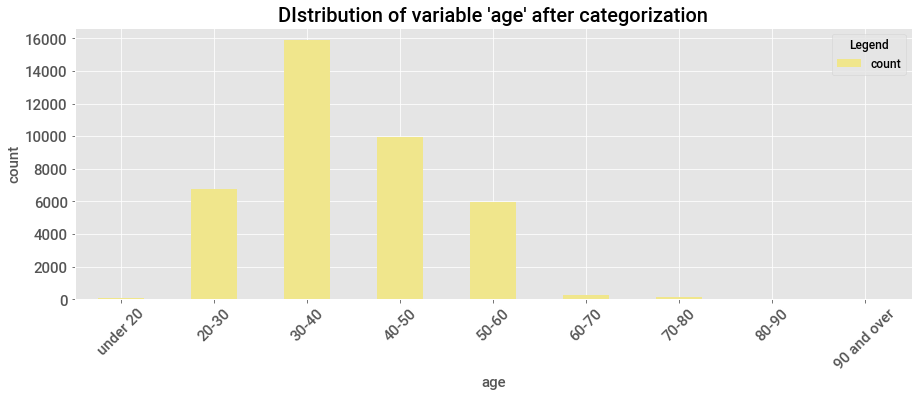

In [261]:
#Wykres obrazujący rozkład kategorii zmiennej age
#Size of plot
rcParams["figure.figsize"] = 15, 5 

#Parameters of plot and OX and OY axis
kategoryzacja_age.plot(kind = "bar",
                       color = "khaki")
plt.title("DIstribution of variable 'age' after categorization", fontsize = 20)
plt.xlabel("age", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)

#Parameters of legend
plt.legend(loc="best",
           prop={"size": 12},
           title="Legend",
           title_fontsize="12",
           frameon=True)

plt.show()

In [262]:
#Categorization of age variable in the dataset using a specially created function
def kat_age(x):
    """
    A function to categorize the variable "age" in a dataset.
    Input: x - Data Frame with a numeric variable named "age".
    Output: categories the variable "age".
    """
    if x["age"] < 20: 
        return "under_20"
    elif (x["age"] >= 20) & (x["age"] < 30):
        return "20_30"
    elif (x["age"] >= 30) & (x["age"] < 40):
        return "30_40"
    elif (x["age"] >= 40) & (x["age"] < 50):
        return "40_50"
    elif (x["age"] >= 50) & (x["age"] < 60):
        return "50_60"
    elif (x["age"] >= 60) & (x["age"] < 70):
        return "60_70"
    elif (x["age"] >= 70) & (x["age"] < 80):
        return "70_80"
    elif (x["age"] >= 80) & (x["age"] < 90):
        return "80_90"
    elif (x["age"] >= 90):
        return "90_and_over"

#Create a new variable "age_cat" using the created function to categorize the age of customers
data["age_cat"] = data.apply(lambda x: kat_age(x), axis = 1)
#To make sure that the function works properly
data[["age", "age_cat"]].sample(10)

,age,age_cat
31667,32,30_40
13862,29,20_30
19164,30,30_40
3116,38,30_40
28537,33,30_40
25151,30,30_40
7958,27,20_30
10395,41,40_50
8761,41,40_50
29313,58,50_60


In [263]:
#Removing of "age" variable
data.drop(columns=["age"], inplace = True)

## 4.4 EDA & FE - job

In [53]:
#Unique values of variable "job"
data["job"].unique()

array(['blue-collar', 'technician', 'services', 'management', 'admin.',
       'housemaid', 'unemployed', 'entrepreneur', 'retired',
       'self-employed', 'unknown', 'student'], dtype=object)

In [264]:
#Unifying the values of the job variable
data["job"].replace({"admin." : "admin"}, inplace = True)
data["job"].replace({"self-employed" : "self_employed"}, inplace = True)
data["job"].replace({"blue-collar" : "blue_collar"}, inplace = True)

In [55]:
#Distribution of "job" variable
data["job"].value_counts()

admin            9844
blue_collar      9126
technician       6463
services         3886
management       2790
entrepreneur     1426
self_employed    1378
retired          1304
housemaid         990
unemployed        933
student           674
unknown           304
Name: job, dtype: int64

## 4.5 EDA & FE - education

In [56]:
#Unique values of variable "education"
data["education"].unique()

array(['basic.4y', 'unknown', 'high.school', 'basic.9y',
       'university.degree', 'professional.course', 'basic.6y',
       'illiterate'], dtype=object)

In [265]:
#Unifying the value of the variable "education"
data["education"].replace({"university.degree" : "university_degree"}, inplace = True)
data["education"].replace({"high.school" : "high_school"}, inplace = True)

In [58]:
#Distribution of variable "education"
data["education"].value_counts()

university_degree      11425
high_school             9081
basic.9y                5908
professional.course     4974
basic.4y                3900
basic.6y                2244
unknown                 1569
illiterate                17
Name: education, dtype: int64

In [266]:
#Generalization of variable "education"
data["education"]=np.where(data["education"] =="basic.9y", "basic", data["education"])
data["education"]=np.where(data["education"] =="basic.6y", "basic", data["education"])
data["education"]=np.where(data["education"] =="basic.4y", "basic", data["education"])

In [60]:
#Distribution of variable "education" after generalization
data["education"].value_counts()

basic                  12052
university_degree      11425
high_school             9081
professional.course     4974
unknown                 1569
illiterate                17
Name: education, dtype: int64

## 4.6 EDA - categorical variables (after features engineering)

In [144]:
#Function to generate graphs for categorical variables based on the target
def plot_bar_categorical(zmienna):
    """
    Function to generate a bar chart for categorical variables to give a general idea of under which conditions 
    subscription was purchased.
    Input:
    Variable: name of categorical variable e.g. "day_of_week"
    Output:
    Bar chart relating the variable and the target (whether the customer bought subscriptions)
    """
    #Data Frame 
    df_1 = pd.DataFrame()
    df_1["Nie_subskrypcja"] = data[data['y'] == 0][zmienna].value_counts()
    df_1["Tak_subskrypcja"] = data[data['y'] == 1][zmienna].value_counts()
    #Parameters of plot
    rcParams["figure.figsize"] = 15,5
    df_1.plot(kind = "bar")
    plt.xlabel(f"{zmienna}", fontsize = 15)
    plt.ylabel("Liczba klientów", fontsize = 15)
    plt.xticks(fontsize = 15, rotation = 45)
    plt.yticks(fontsize = 15)
    plt.title("Rozkład zmiennej {} w kontekście subskrypcji".format(zmienna), fontsize = 20)
    #Legend
    plt.legend(loc="best",
               prop={"size": 10},
               title="Subskrypcja ?",
               title_fontsize="10",
               frameon=True)
    
    plt.tight_layout()
    plt.show()

In [145]:
#List of categorical variables without target variable
kategoryczne_zmienne = data.select_dtypes(include = ["object"]).columns.tolist()
kategoryczne_zmienne_bez_targetu = [col for col in kategoryczne_zmienne if col not in  ["y"]]
kategoryczne_zmienne_bez_targetu

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'age_cat']

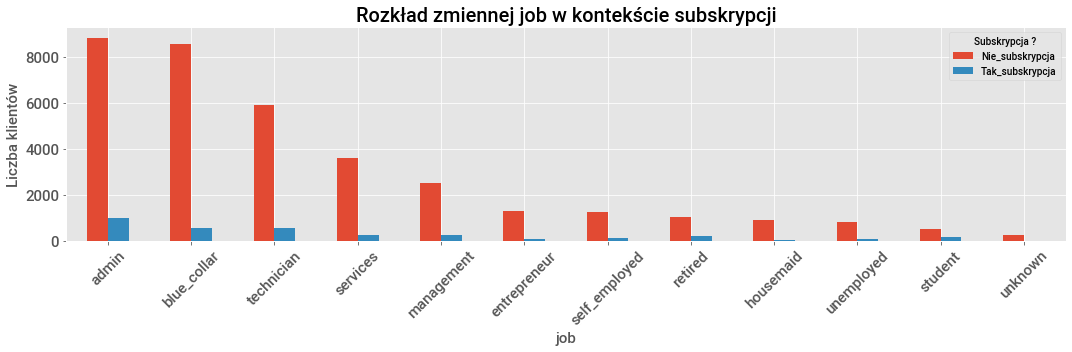

<Figure size 1080x360 with 0 Axes>

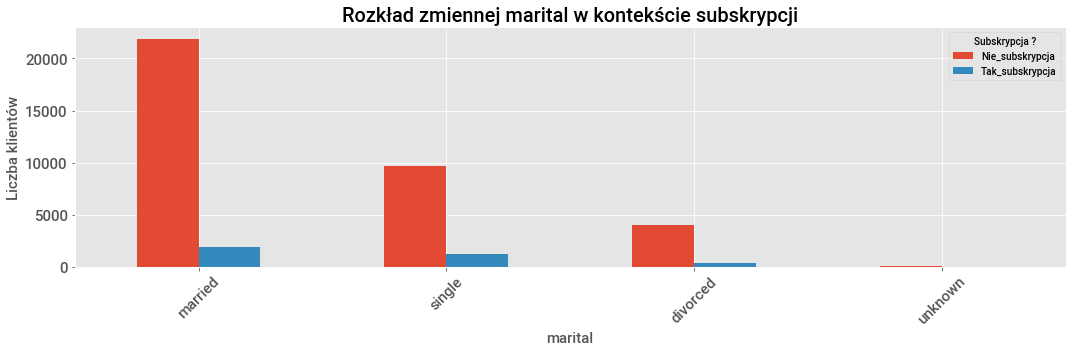

<Figure size 1080x360 with 0 Axes>

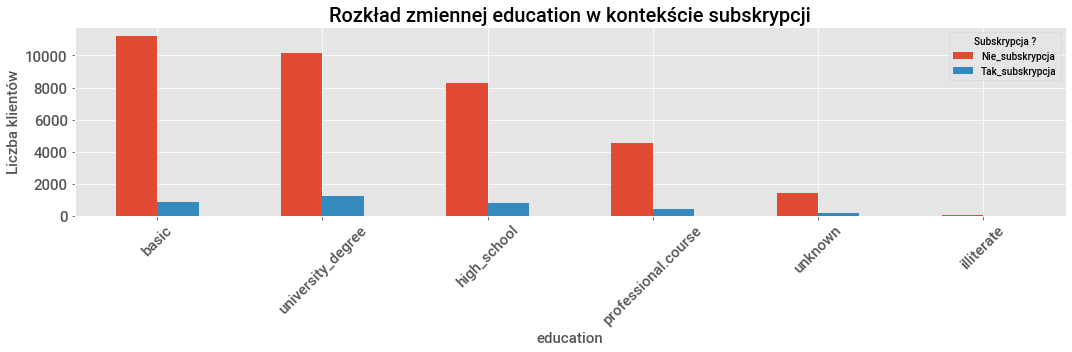

<Figure size 1080x360 with 0 Axes>

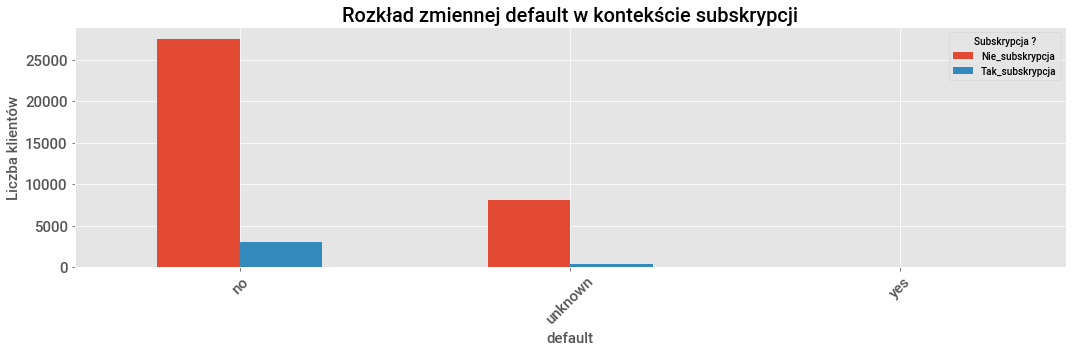

<Figure size 1080x360 with 0 Axes>

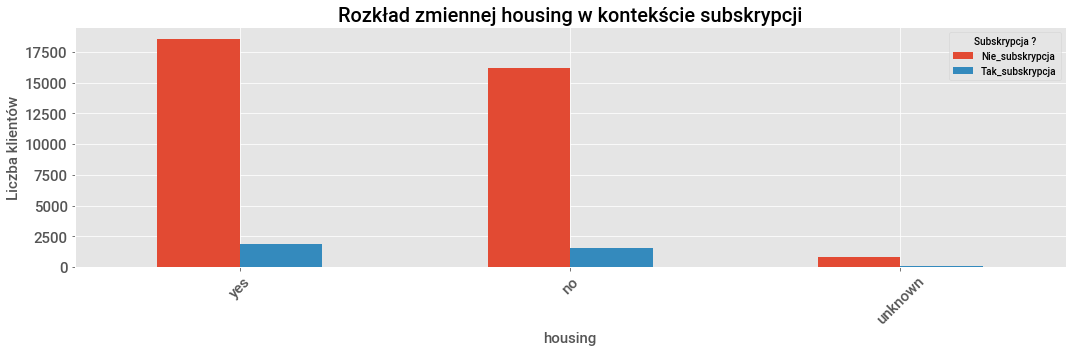

<Figure size 1080x360 with 0 Axes>

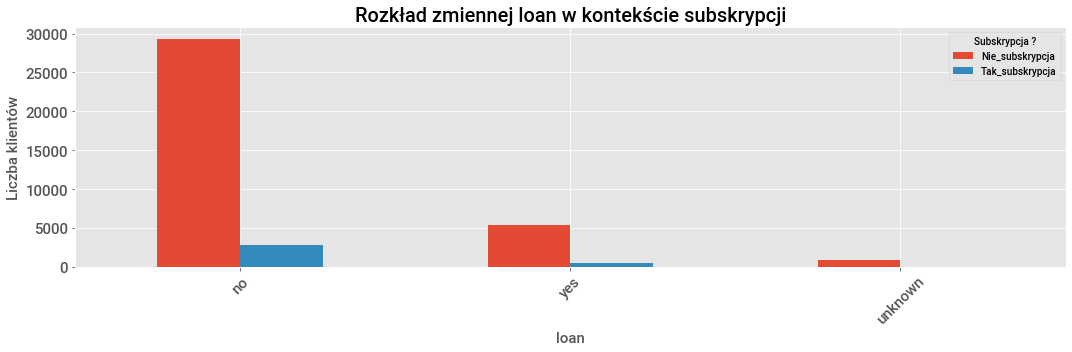

<Figure size 1080x360 with 0 Axes>

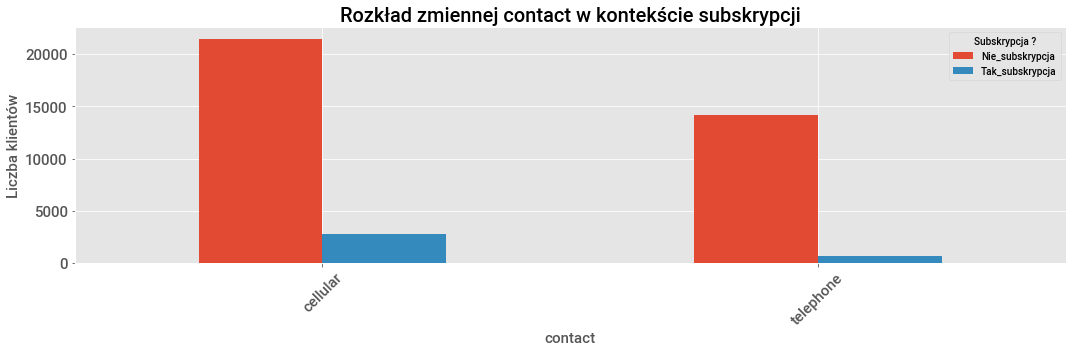

<Figure size 1080x360 with 0 Axes>

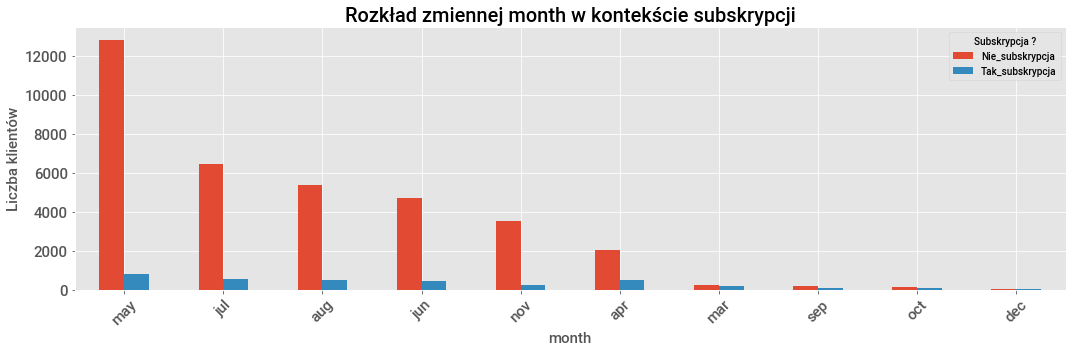

<Figure size 1080x360 with 0 Axes>

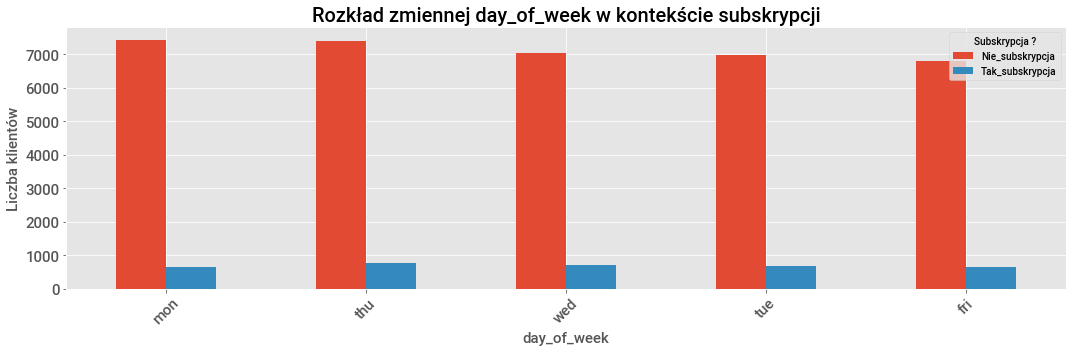

<Figure size 1080x360 with 0 Axes>

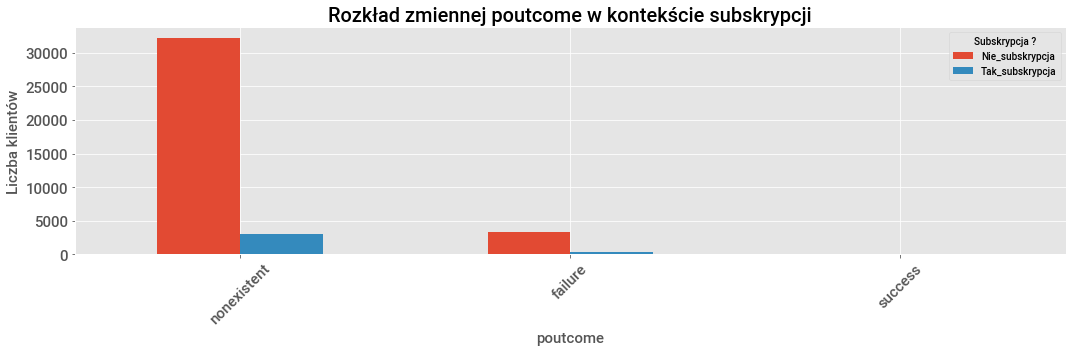

<Figure size 1080x360 with 0 Axes>

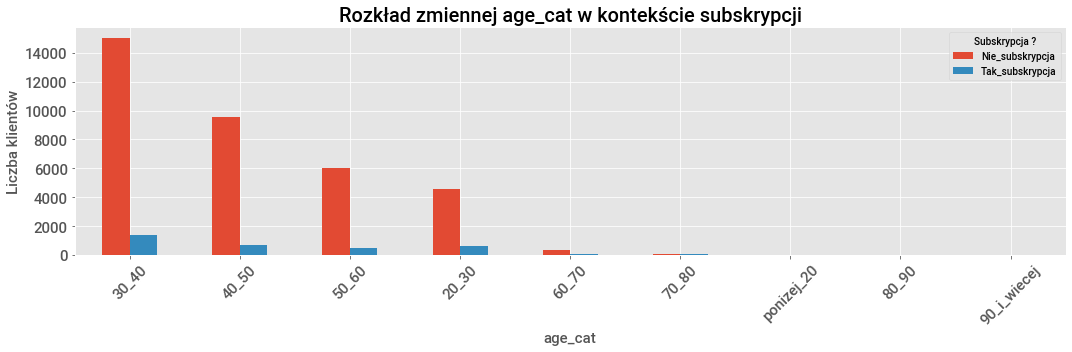

<Figure size 1080x360 with 0 Axes>

In [146]:
#Loop over categorical variables without a target variable using the created function to generate bar graphs
for zmienna in kategoryczne_zmienne_bez_targetu:
    #Generate a graph for each variable with "variable"
    plot_bar(f"{zmienna}")
    plt.tight_layout()
    plt.show()

## 4.7 EDA - numerical variables (after features engineering)

In [176]:
#Function to generate graphs for numerical variables based on a target
def plot_bar_numeric(zmienna):
    """
    Function to generate a bar chart for numeric variables to give a general idea of under which conditions 
    subscription was purchased.
    Input:
    Variable: name of numeric variable e.g. "duration"
    Output:
    Bar chart relating to the variable and the target (whether the customer bought subscriptions)
    """
    #Data Frame with the results of the mean and median of individual variables
    sredni_czas_rozmowy = data.groupby("y").agg({f"{zmienna}" : [np.mean, np.median]})
    #Plot
    sredni_czas_rozmowy.plot(kind = "bar")
    #Size of plot
    rcParams["figure.figsize"] = 15,5
    #Parameters of plot
    plt.xlabel("Czy klient zakupił depozyt?", fontsize = 15)
    #plt.ylabel("", fontsize = 15)
    plt.xticks(fontsize = 15, rotation = 0)
    plt.yticks(fontsize = 15)
    plt.title("Średnia i mediana {}, a zakup subskrypcji".format(zmienna), fontsize = 20)
    #Legend
    plt.legend(loc="best",
                prop={"size": 12},
                title="Średnia i mediana {}".format(zmienna),
                title_fontsize="14",
                frameon=True)
    
    plt.tight_layout()
    plt.show()

In [177]:
#List of numeric variables without target variable (for formality without target variable)
numeryczne_zmienne = data.select_dtypes(include = ["int64", "float64"]).columns.tolist()
numeryczne_zmienne_bez_targetu = [col for col in numeryczne_zmienne if col not in  ["y"]]
numeryczne_zmienne_bez_targetu

['duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

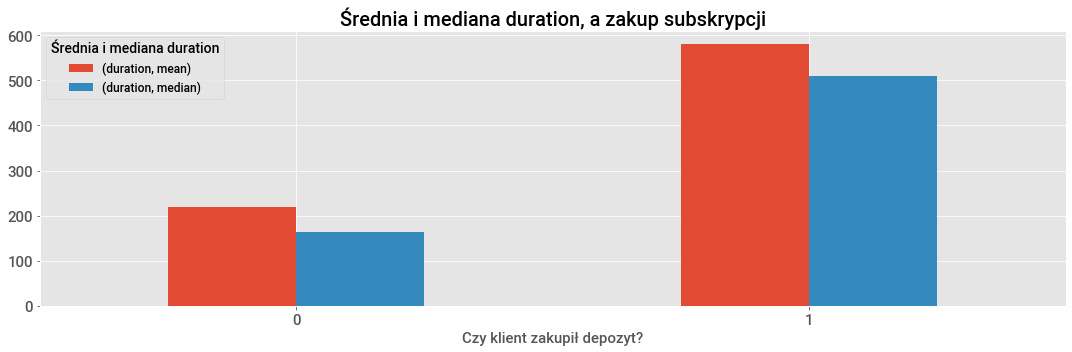

<Figure size 1080x360 with 0 Axes>

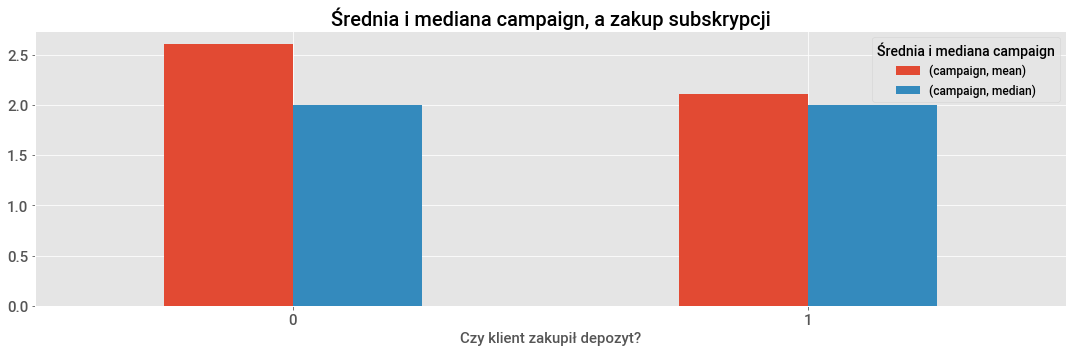

<Figure size 1080x360 with 0 Axes>

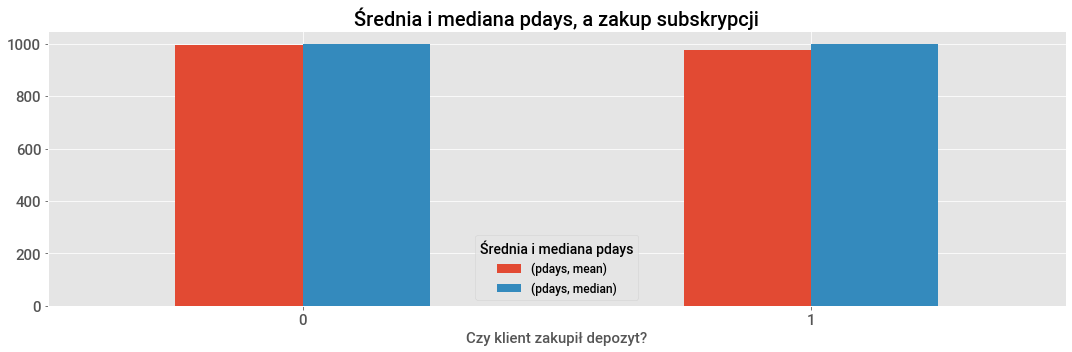

<Figure size 1080x360 with 0 Axes>

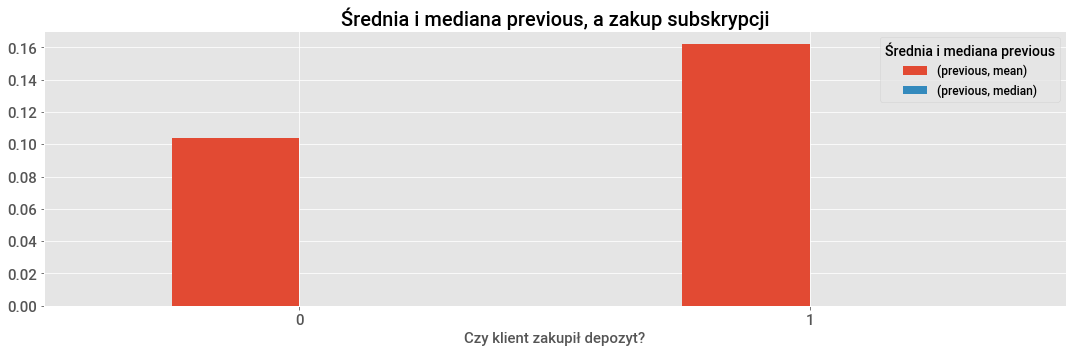

<Figure size 1080x360 with 0 Axes>

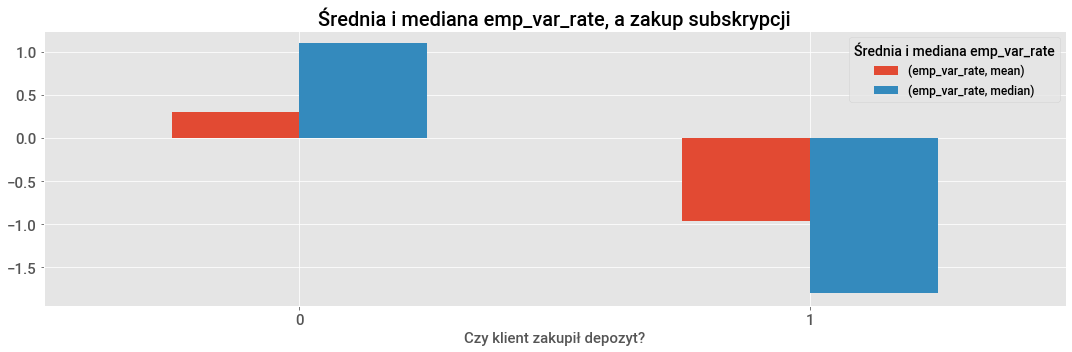

<Figure size 1080x360 with 0 Axes>

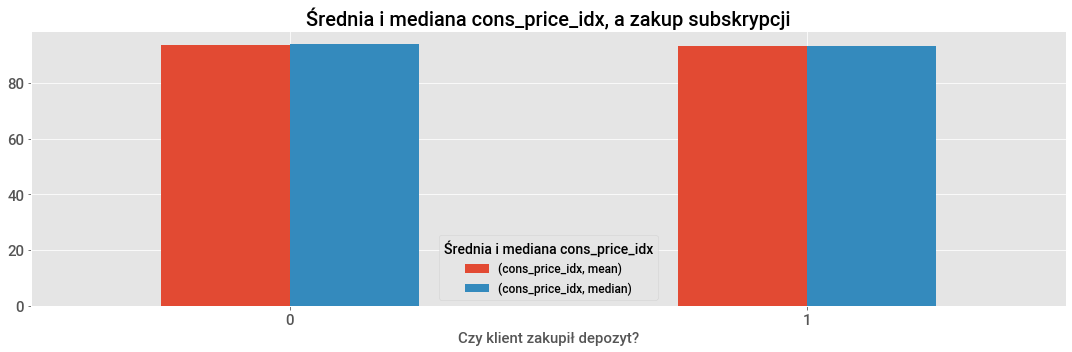

<Figure size 1080x360 with 0 Axes>

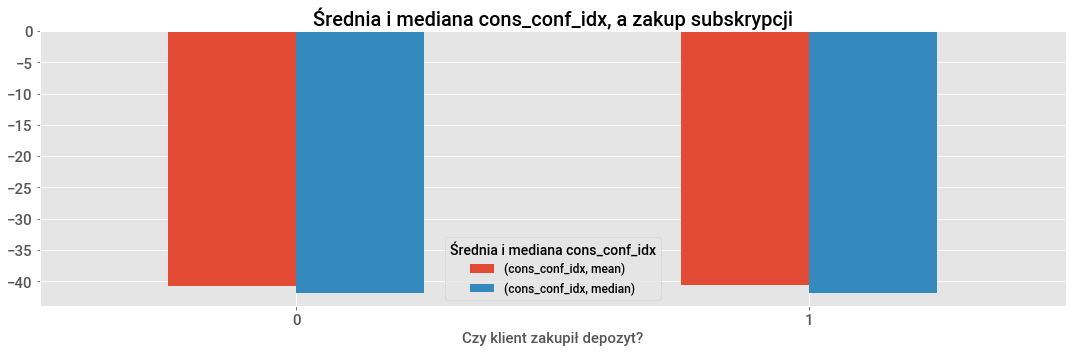

<Figure size 1080x360 with 0 Axes>

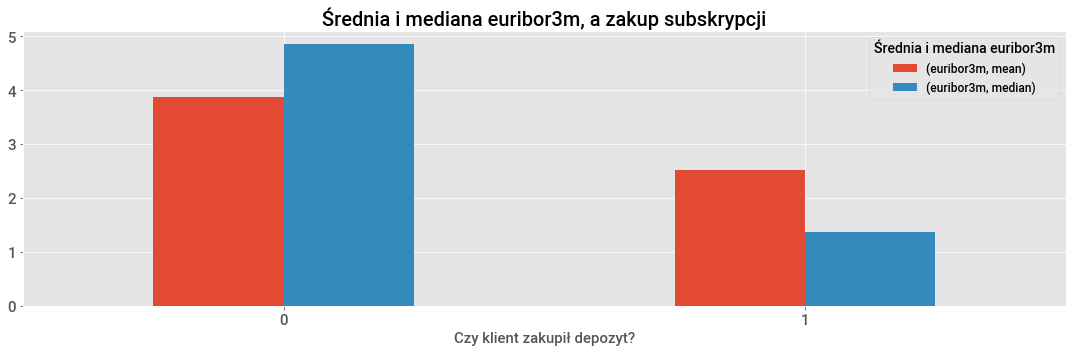

<Figure size 1080x360 with 0 Axes>

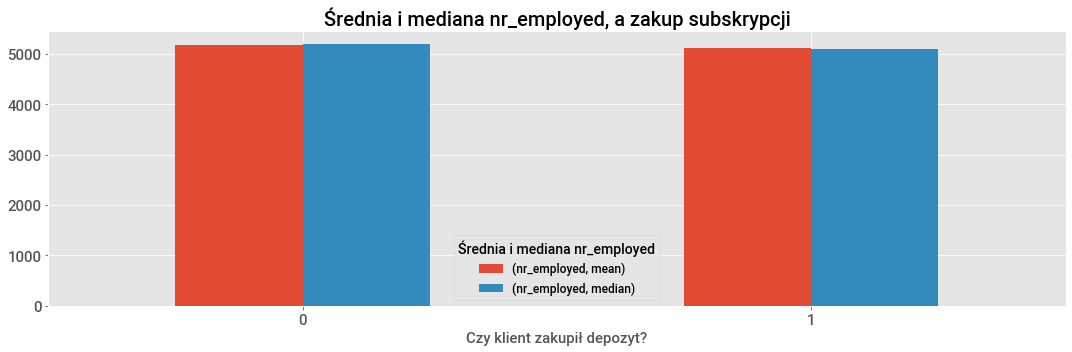

<Figure size 1080x360 with 0 Axes>

In [178]:
#loop over numeric variables without a target variable (for formality) using the function created
#to generate bar graphs
#Of course not all the graphs are relevant and useful for analysis, but for the sake of formality they were all looped
for zmienna in numeryczne_zmienne_bez_targetu:
    #Generate a graph for each variable with "variable"
    plot_bar_numeric(f"{zmienna}")
    plt.tight_layout()
    plt.show()

# 5. Dummy coding

In [267]:
#List of categorical variables without target variable
kategoryczne_zmienne = [x for x in data.select_dtypes(include=["object"]).columns.tolist() if x != "y"]
kategoryczne_zmienne

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'age_cat']

In [268]:
#Dummy coding of categorical variables
data=pd.get_dummies(data,
                    columns = kategoryczne_zmienne,
                    drop_first = True)

In [269]:
#Data Frame after dummy coding
data

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,poutcome_nonexistent,poutcome_success,age_cat_30_40,age_cat_40_50,age_cat_50_60,age_cat_60_70,age_cat_70_80,age_cat_80_90,age_cat_90_and_over,age_cat_under_20
0,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,1,0,0,1,0,0,0,0,0,0
1,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,1,0,0,0,1,0,0,0,0,0
3,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,1,0,1,0,0,0,0,0,0,0
5,68,8,999,0,1.4,93.918,-42.7,4.961,5228.1,0,...,1,0,1,0,0,0,0,0,0,0
6,204,1,999,0,-1.8,92.893,-46.2,1.327,5099.1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0,...,1,0,0,0,1,0,0,0,0,0
41184,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,...,1,0,1,0,0,0,0,0,0,0
41185,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,1,0,0,0,0,0,0
41186,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0,...,1,0,0,1,0,0,0,0,0,0


In [270]:
#Variables after dummy coding
data.columns

Index(['duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_high_school', 'education_illiterate',
       'education_professional.course', 'education_university_degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'age_cat_30_40', 'age_cat_40_5

# 6. CORR analysis

## 6.1 Correlation between target and independent variables

In [271]:
#Spearman correlation coefficient
corr_spearman = data.corr(method="spearman").abs()[["y"]].sort_values(by="y", ascending=False)
corr_spearman.rename(columns={"y" : "y_spearman"}, inplace=True)
corr_spearman.to_excel("CORR_analysis/CORR_Spearemana_target_independents.xlsx")
corr_spearman

,y_spearman
y,1.000000
duration,0.333615
nr_employed,0.197113
emp_var_rate,0.188365
euribor3m,0.181955
cons_price_idx,0.141990
month_mar,0.140493
contact_telephone,0.116426
poutcome_success,0.105587
pdays,0.105563


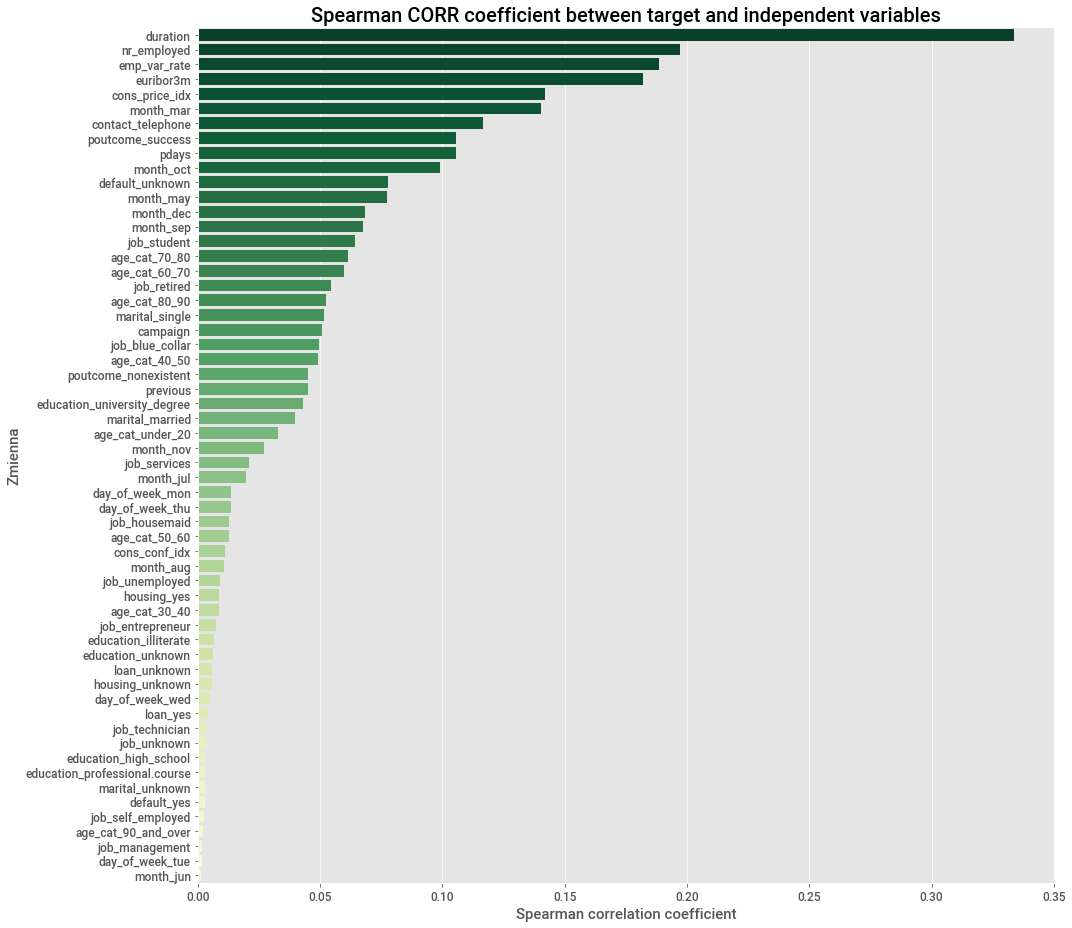

In [272]:
#Visualization of Spearman correlation coefficient
correlation_matrix = pd.DataFrame(np.abs(data.corr(method="spearman")), columns = data.columns, index = data.columns)
correlation_matrix.drop('y', axis = 0, inplace = True)
correlation_matrix.reset_index(inplace=True)

#Size of plot
plt.figure(figsize=(15,13))\
#Parameters of plot
sns.barplot(data = correlation_matrix.sort_values('y', ascending=False),
            x = "y",
            y = "index",
            palette = "YlGn_r")
plt.title("Spearman CORR coefficient between target and independent variables", fontsize=20)
plt.xlabel("Spearman correlation coefficient", fontsize=15)
plt.ylabel("Zmienna", fontsize=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

#Saving of plot
plt.savefig("CORR_analysis/CORR_Spearman_target_independents.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

In [185]:
#Too high correlation between independent variables and taget variable
corr_treshold = 0.80
high_corr = corr_spearman[corr_spearman["y_spearman"] > corr_treshold][["y_spearman"]].index.tolist()
corr_to_drop = [column for column in high_corr if column != "y"]
corr_to_drop

[]

In [186]:
#Too low correlation between independent variables and target variable
corr_treshold = 0.005
low_corr = corr_spearman[corr_spearman["y_spearman"] < corr_treshold][["y_spearman"]].index.tolist()
corr_to_drop_2 = [column for column in low_corr if column != "y"]
corr_to_drop_2

['loan_yes',
 'job_technician',
 'marital_unknown',
 'job_unknown',
 'default_yes',
 'day_of_week_tue',
 'job_self_employed',
 'education_high_school',
 'job_management']

In [187]:
#Drop of independent variables with too high or too low correlation with target variable
data.drop(columns = corr_to_drop, inplace = True)
data.drop(columns = corr_to_drop_2, inplace = True)

## 6.2 Correlation between independent variables

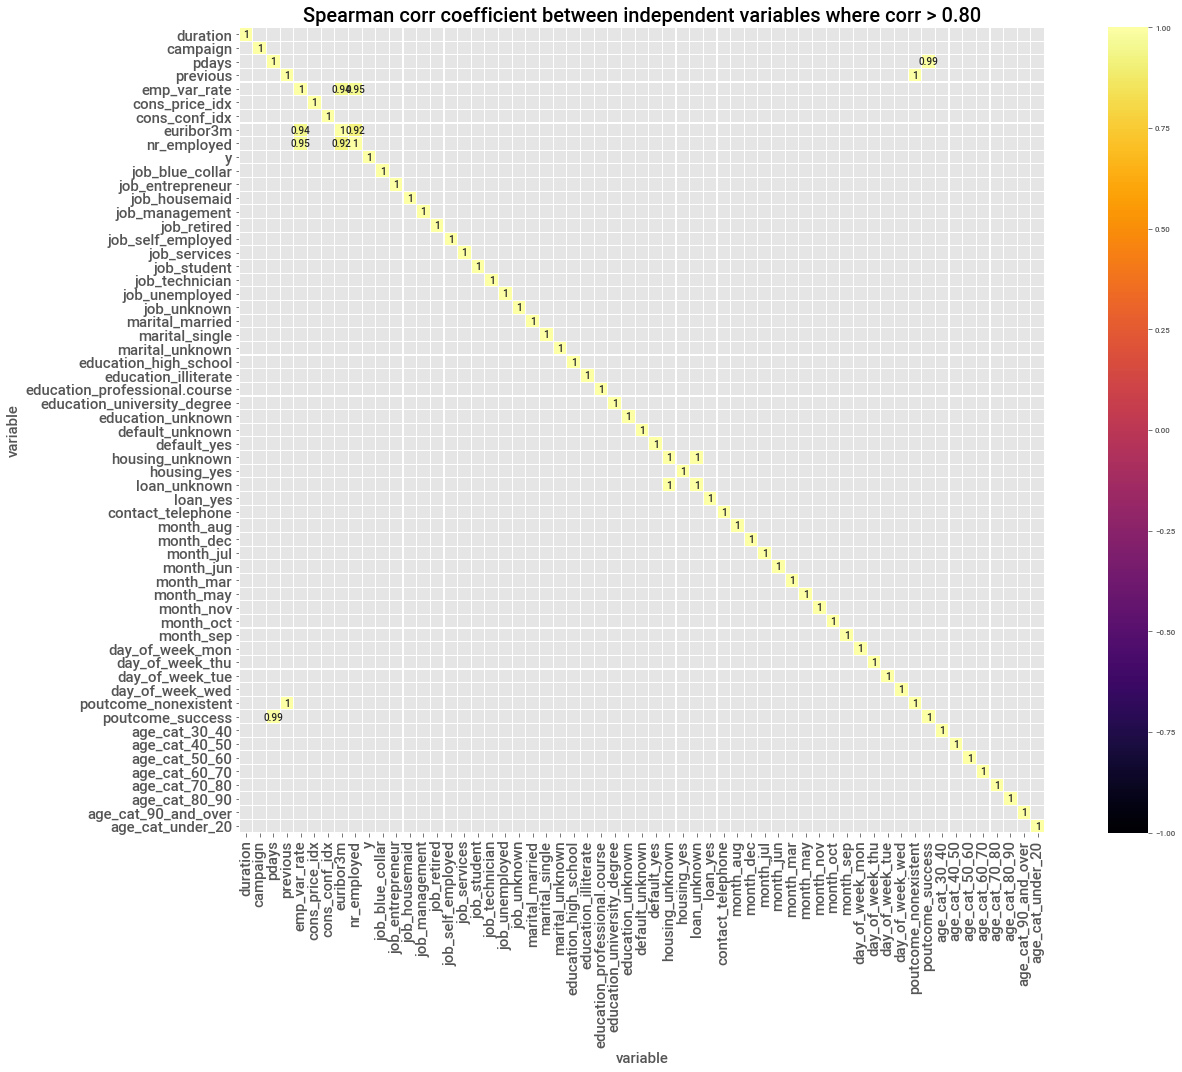

In [273]:
#Visualization of correlation where correlation between independent variables is > 0.80
corr = data.corr(method="spearman").abs() 
#Size of heatmap
plt.figure(figsize=(20, 15))

#Parameters of heatmap
sns.heatmap(corr[(corr >= 0.80)], 
            cmap='inferno', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True)
plt.title("Spearman corr coefficient between independent variables where corr > 0.80", fontsize=20)
plt.xlabel("variable", fontsize = 15)
plt.ylabel("variable", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Saving of heatmap
plt.savefig("CORR_analysis/CORR_Spearman_independent_variables.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

In [274]:
#Correlation between independent variables
upper = corr.where(np.triu(np.ones(corr.shape), k =1).astype(np.bool))
#Arbitrarily set threshold of too high correlation - once it is exceeded the variable is to be removed
corr_treshold = 0.80
col_to_drop_3 = [col for col in upper.columns if any(upper[col] > corr_treshold)]
col_to_drop_3

['euribor3m',
 'nr_employed',
 'loan_unknown',
 'poutcome_nonexistent',
 'poutcome_success']

In [275]:
#Drop of independent variables with too high correlation with other independent variables
data.drop(columns = col_to_drop_3, inplace = True)

# 7. Features selection - Forward method

In [277]:
#Split of dataset to train and test
X_forward = data.drop(labels=["y"], axis=1)
y_forward = data["y"]
X_train,X_test,y_train,y_test = train_test_split(X_forward, y_forward, train_size=0.6, test_size=0.4,random_state=10)

#Building a classifier for variable selection
classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)

#Features selection using Forward method
forward_selection = sfs(classifier,
                        k_features="best",
                        forward=True,
                        floating=False,
                        verbose=0,
                        cv=5)

#Performing variable selection
forward_selection = forward_selection.fit(X_train, y_train)
#Indexes of selected variables
forward_features_selected = list(forward_selection.k_feature_idx_)

In [278]:
#Summary of variables selection using FOrward method
wybrane_zmienne_forward = X_train.iloc[:,forward_features_selected].columns.tolist()
all_columns = [column for column in data.columns.tolist() if column != "y"]
nie_wybrane_zmienne_forward = [x for x in all_columns if x not in wybrane_zmienne_forward]

print("Features selected by Forward method:", wybrane_zmienne_forward)
print("Number of selected variables:", len(wybrane_zmienne_forward))
print()
print("Did not seleted variables:", nie_wybrane_zmienne_forward)
print("Number of selected variables:", len(nie_wybrane_zmienne_forward))

Features selected by Forward method: ['duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'job_housemaid', 'job_management', 'job_retired', 'job_self_employed', 'job_services', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_high_school', 'education_illiterate', 'education_professional.course', 'education_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'age_cat_30_40', 'age_cat_40_50', 'age_cat_60_70', 'age_cat_70_80', 'age_cat_80_90', 'age_cat_90_and_over', 'age_cat_under_20']
Number of selected variables: 46

Did not seleted variables: ['job_blue_collar', 'job_entrepreneur', 'job_student', 'job_technician', 'education_university_degree', 'default_unknown', 

In [279]:
#Drop of features from the dataset which was not selected
data.drop(columns = nie_wybrane_zmienne_forward, inplace = True)

# 8. Build of function to accelerate modelling

## 8.1 Confusion matrix - function

In [280]:
#Function to plot the configuration matrix along with statistics of this metric.
def conf_matrix(model_name, y_test, pred_test):
    """
    Function to plot the configuration matrix along with statistics of this metric.
    Input:
    model_name: model name, e.g., "XGBoost" or "Random Forest"
    y_test: target variable from the test set
    pred_test: prediction from the test set
    Output:
    Confusion matrix with associated statistics.
    """
    print("Macierz pomyłek modelu: " + model_name)
    CM = confusion_matrix(y_test, pred_test)
    print(CM)

    print("-"*40)

    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    TP = CM[1][1]
    sensitivity=TP/float(TP+FN)
    specificity=TN/float(TN+FP)

    print("True Negative:", TN)
    print("False Positive:", FP)
    print("False Negative:", FN)
    print("True Positive:", TP)
    print("Poprawność predykcji", round((TN + TP) / len(pred_test) * 100, 2), "%")

## 8.2 Classification report - function

In [281]:
#Function that generates classification report for sets: training, test.
def class_report(y_test, y_train, pred_test, pred_train, model_name):
    """
    Function that generates classification report for sets: training, test.
    Input:
    y_test: target variable from the test set
    y_train: target variable from training set
    pred_test: prediction from test set
    pred_train: prediction from training set
    model_name: the name of the model, e.g. "XGBoost" or "Random Forest"
    """
    #Classification report na zbiorach treningowym i testowym
    print("CLassification report dla modelu: " + model_name + " na zbiorze treningowym:")
    print(classification_report(y_train, pred_train))
    print("*"*55)
    print("CLassification report dla modelu: " + model_name + " na zbiorze testowym:")
    print(classification_report(y_test, pred_test))

## 8.3 Comparison of statistics on training and test datasets - function

In [282]:
#Function to generate Data Frame with statistics comparison on training and test sets.
def stat_comparison(y_test, y_train, X_test, X_train, pred_test, pred_train, model):
    """
    Function to generate Data Frame with statistics comparison on training and test sets.
    Input:
    y_test: target variable from the test set
    y_train: target variable from the training set
    X_test: explanatory variables from the test set
    X_train: explanatory variables from the training set
    pred_test: pre-diction from test set
    pred_train: prediction from the training set
    model: created classifier
    Output:
    DataFrame with statistics from the training and test sets.
    """
    #TRAIN
    accuracy_TRAIN = round(accuracy_score(y_train, pred_train),2)
    recall_TRAIN = round(recall_score(y_train, pred_train),2)
    precision_TRAIN = round(precision_score(y_train, pred_train),2)
    f1_TRAIN = round(f1_score(y_train, pred_train),2)
    y_prob_TRAIN = model.predict_proba(X_train)[::,1]
    AUC_TRAIN = metrics.roc_auc_score(y_train, y_prob_TRAIN)
    ginig_TRAIN = round((2*AUC_TRAIN) - 1,2)

    #TEST
    accuracy_TEST = round(accuracy_score(y_test, pred_test),2)
    recall_TEST = round(recall_score(y_test, pred_test),2)
    precision_TEST = round(precision_score(y_test, pred_test),2)
    f1_TEST = round(f1_score(y_test, pred_test),2)
    y_prob_TEST = model.predict_proba(X_test)[::,1]
    AUC_TEST = metrics.roc_auc_score(y_test, y_prob_TEST)
    ginig_TEST = round((2*AUC_TEST) - 1,2)
    
    #Data Frame with comparison of statistics on training and test sets
    porownanie_df = pd.DataFrame({"Zbiór" : ["treningowy", "testowy"],
                                  "Accuracy" : [accuracy_TRAIN, accuracy_TEST],
                                  "Precision" : [precision_TRAIN, precision_TEST],
                                  "Recall" : [recall_TRAIN, recall_TEST],
                                  "F1" : [f1_TRAIN, f1_TEST],
                                  "AUC" : [AUC_TRAIN, AUC_TEST],
                                  "Gini" : [ginig_TRAIN, ginig_TEST]}).set_index("Zbiór")
    print("Porównanie statystyk na zbiorach treningowym i testowym:")
    
    #Save results to Excel file
    if model == DT:
        porownanie_df.to_excel("DecisionTree_results/porownanie_zbiory.xlsx")
    elif model == XGB:
        porownanie_df.to_excel("XGBoost_results/porownanie_zbiory.xlsx")
        
    return porownanie_df

## 8.4 ROC curves for training and test datasets - function

In [283]:
#Function to generate ROC curve with AUC metric.
def plot_roc_cur(model, X, y, df, color, model_name):  
    """
    Function to generate ROC curve with AUC metric.
    Input: 
    model: created classifier
    X: explanatory variables
    y: objective variable
    df: name of the set for which the ROC curve is generated: "training" / "test"
    color: color of ROC plot
    model_name: name of built model for exampe: XGboost / Random Forest / Logistic Regression and so on
    Output:
    ROC curve with AUC metric
    """
    #Parameters of ROC curve
    probs = model.predict_proba(X)[::,1]
    auc = metrics.roc_auc_score(y, probs)
    fper, tper, thresholds = roc_curve(y, probs)
    plt.plot(fper, tper, label= model_name + " (auc = %0.3f)" % auc, color=color)
    plt.plot([0, 1], [0, 1], color="black", linestyle='--')
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #Selection of the set for which the ROC curve is generated
    if df == "treningowy":
        plt.title("Receiver Operating Characteristic (ROC) Curve dla zbioru treningowego", fontsize=20)
    elif df == "testowy":
        plt.title("Receiver Operating Characteristic (ROC) Curve dla zbioru testowego", fontsize=20)
    else:
        plt.title("Wybierz zbiór danych: 'treningowy' / 'testowy'")
    #Legend
    plt.legend(loc="best", 
               fontsize=15,
               prop={"size": 14},
               title="Area Under Curve (AUC)",
               title_fontsize="16",
               frameon=True)
    plt.tight_layout()
    plt.show()

## 8.5 Comparison of ROC curves and AUC metrics for training and test datasets - function

In [284]:
#Function to generate ROC curves with AUC metrics on 1 graph
def compar_roc(X_test, y_test, X_train, y_train, model_name, model):
    """
    Function to generate ROC curves along with AUC metrics in 1 plot to compare training and test sets.
    Input:
    X_test: explanatory variables from the test set
    y_test: target variable from test set
    X_train: explanatory variables from the training set
    y_train: target variable from the training set
    model_name: model name e.g. "XGBoost"
    model: created classifier e.g. XGB
    Output:
    ROC curves for the training and test sets along with AUC metrics for 1 model in 1 plot.
    """
    #ROC train
    y_pred_prob1 = model.predict_proba(X_test)[:,1]
    auc1 = metrics.roc_auc_score(y_test, y_pred_prob1)
    fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
    
    #ROC test
    y_pred_prob2 = model.predict_proba(X_train)[:,1]
    auc2 = metrics.roc_auc_score(y_train, y_pred_prob2)
    fpr2 , tpr2, thresholds2 = roc_curve(y_train, y_pred_prob2)
    
    #Parameters of ROC curve
    rcParams["figure.figsize"] = 18,7
    plt.plot([0,1],[0,1], 'k--', color="black")
    plt.plot(fpr1, tpr1, label= "Zbiór testowy" + " (AUC = %0.3f)" % auc1)
    plt.plot(fpr2, tpr2, label= "Zbiór treningowy" + " (AUC = %0.3f)" % auc2)
    #Axis
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("Receiver Operating Characteristic (ROC) - oba zbiory " + model_name, fontsize=25)
    #Legend
    plt.legend(loc="best",
               prop={"size": 15},
               title="Metryka AUC",
               title_fontsize="15",
               frameon=True)
    
    #Saving results
    if model_name == "Decision Tree":
        return plt.savefig("DecisionTree_results/ROC_AUC_train_test.png", bbox_inches="tight")
    elif model_name == "XGBoost":
        return plt.savefig("XGBoost_results/ROC_AUC_train_test.png", bbox_inches="tight")
    
    plt.tight_layout()
    plt.show()

# 9. Decision Tree - ML model

## 9.1 Tuning of hiper parameters - loop

In [340]:
#Split dataset into independent variables and target variable
X_DT = data.loc[:, data.columns != "y"].columns.tolist()
y_DT = data.loc[:, data.columns == "y"].columns.tolist()

In [341]:
#Wrapper for Decision Tree cross validation
def CVTestDTClass(nFolds = 5, randomState=2020, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    #Lists for storing results
    testResults = []
    trainResults = []
    predictions = []
    indices = []

    #Loop validating the model on successive folds
    for train_DT, test_DT in kf.split(data.index.values):
        #Preparation of estimator
        DT = DecisionTreeClassifier(*args, **kwargs, random_state=randomState)
        #Training of Decision Tree model
        DT.fit(data.iloc[train_DT][X_DT], data.iloc[train_DT][y_DT])

        #Prediction on train and test datasets
        predictions_train = DT.predict_proba(data.iloc[train_DT][X_DT])[:,1]
        predictions_test = DT.predict_proba(data.iloc[test_DT][X_DT])[:,1]
        
        #Retention of forecast information for a given folds
        predictions.append(predictions_test.tolist().copy())
        
        #Indexes
        indices.append(data.iloc[test_DT].index.tolist().copy())
        
        #Calculation of the AUC metric for training and test set predictions
        trainScore = roc_auc_score((data[y_DT].iloc[train_DT]==1).astype(int), predictions_train)
        testScore = roc_auc_score((data[y_DT].iloc[test_DT]==1).astype(int), predictions_test)
        
        #Saving results from training and test collections
        trainResults.append(trainScore)
        testResults.append(testScore)
        
    return trainResults, testResults, predictions, indices

In [342]:
#A loop whose goal is to find the best configuration of the hyper parameters of the Decision Tree

#Lists on hyper parameter values
criterion_list = list()
splitter_list = list()
max_depth_list = list()
mss_list = list()
msl_list = list()
max_features_list = list()
mean_TRAIN_list = list()
mean_TEST_list = list()

#Loop with hyper parameters
for criterion  in ["gini", "entropy"]:
    for splitter in ["best", "random"]: 
        for max_depth in [3, 4, 5, 10, 12, 15, 20]: 
            for min_samples_split in [2, 3, 4]: 
                for min_samples_leaf in [1, 2, 3, 4]:
                    for max_features in ["auto", "sqrt", "log2"]:
                        trainResults, testResults, predictions, indices = CVTestDTClass(criterion=criterion,
                                                                                        splitter=splitter,
                                                                                        max_depth=max_depth,
                                                                                        min_samples_split=min_samples_split,
                                                                                        min_samples_leaf= min_samples_leaf,
                                                                                        max_features=max_features)
                        #Adding values of parameters to lists
                        criterion_list.append(criterion)
                        splitter_list.append(splitter)
                        max_depth_list.append(max_depth)
                        mss_list.append(min_samples_split)
                        msl_list.append(min_samples_leaf)
                        max_features_list.append(max_features)
                        mean_TRAIN_list.append(np.mean(trainResults))
                        mean_TEST_list.append(np.mean(testResults))
                
                        #Display of mean scores for training and test set from 5 folds
                        #at different hyper parameter configurations.
                        print(criterion, "||",
                        splitter, "||",
                        max_depth,"||",
                        min_samples_split, "||",
                        min_samples_leaf, "||",
                        max_features, "||",
                        np.mean(testResults), "||",
                        np.mean(trainResults), "||",
                        (np.mean(trainResults) - np.mean(testResults)))
      
                        #Zapisanie rezultatów tuningu hiper parametrów do Data Frame
                        df_dt = pd.DataFrame()
                        df_dt["criterion"] =  criterion_list
                        df_dt["splitter"] = splitter_list
                        df_dt["max_depth"] = max_depth_list
                        df_dt["min_samples_split"] = mss_list
                        df_dt["min_samples_leaf"] = msl_list
                        df_dt["max_features"] = max_features_list
                        df_dt["mean_TEST"] = mean_TEST_list
                        df_dt["mean_TRAIN"] = mean_TRAIN_list
                        df_dt["TRAIN_TEST_difference"] = df_dt["mean_TRAIN"] - df_dt["mean_TEST"]

gini || best || 3 || 2 || 1 || auto || 0.8897376221748251 || 0.8917361395539498 || 0.001998517379124709
gini || best || 3 || 2 || 1 || sqrt || 0.8897376221748251 || 0.8917361395539498 || 0.001998517379124709
gini || best || 3 || 2 || 1 || log2 || 0.801582638952923 || 0.8038218030005156 || 0.0022391640475926122
gini || best || 3 || 2 || 2 || auto || 0.8897376221748251 || 0.8917361395539498 || 0.001998517379124709
gini || best || 3 || 2 || 2 || sqrt || 0.8897376221748251 || 0.8917361395539498 || 0.001998517379124709
gini || best || 3 || 2 || 2 || log2 || 0.801582638952923 || 0.8038218030005156 || 0.0022391640475926122
gini || best || 3 || 2 || 3 || auto || 0.8896937796345583 || 0.8917509486357528 || 0.0020571690011944588
gini || best || 3 || 2 || 3 || sqrt || 0.8896937796345583 || 0.8917509486357528 || 0.0020571690011944588
gini || best || 3 || 2 || 3 || log2 || 0.801582638952923 || 0.8038218030005156 || 0.0022391640475926122
gini || best || 3 || 2 || 4 || auto || 0.8901600941815386 || 0

gini || best || 5 || 2 || 3 || sqrt || 0.8943193886938013 || 0.9006514188880462 || 0.0063320301942448864
gini || best || 5 || 2 || 3 || log2 || 0.8381572931564142 || 0.8426295966706778 || 0.0044723035142636425
gini || best || 5 || 2 || 4 || auto || 0.8925653586875537 || 0.9000492021970565 || 0.007483843509502819
gini || best || 5 || 2 || 4 || sqrt || 0.8925653586875537 || 0.9000492021970565 || 0.007483843509502819
gini || best || 5 || 2 || 4 || log2 || 0.8370656912295906 || 0.8417764802156558 || 0.00471078898606514
gini || best || 5 || 3 || 1 || auto || 0.8964670483164348 || 0.9043832228889437 || 0.007916174572508927
gini || best || 5 || 3 || 1 || sqrt || 0.8964670483164348 || 0.9043832228889437 || 0.007916174572508927
gini || best || 5 || 3 || 1 || log2 || 0.8341612062852122 || 0.837821618509355 || 0.003660412224142817
gini || best || 5 || 3 || 2 || auto || 0.8964667951183849 || 0.9043693929166301 || 0.007902597798245203
gini || best || 5 || 3 || 2 || sqrt || 0.8964667951183849 || 0.9

gini || best || 12 || 3 || 1 || log2 || 0.8508975195549976 || 0.9420781277768542 || 0.09118060822185658
gini || best || 12 || 3 || 2 || auto || 0.8842432804650266 || 0.9500931707015889 || 0.06584989023656229
gini || best || 12 || 3 || 2 || sqrt || 0.8842432804650266 || 0.9500931707015889 || 0.06584989023656229
gini || best || 12 || 3 || 2 || log2 || 0.8803076183664974 || 0.942372194394909 || 0.062064576028411644
gini || best || 12 || 3 || 3 || auto || 0.8899338649769003 || 0.9500423931347362 || 0.06010852815783585
gini || best || 12 || 3 || 3 || sqrt || 0.8899338649769003 || 0.9500423931347362 || 0.06010852815783585
gini || best || 12 || 3 || 3 || log2 || 0.8884107832673566 || 0.9382857233563874 || 0.04987494008903082
gini || best || 12 || 3 || 4 || auto || 0.8962307630798957 || 0.94542105774274 || 0.0491902946628443
gini || best || 12 || 3 || 4 || sqrt || 0.8962307630798957 || 0.94542105774274 || 0.0491902946628443
gini || best || 12 || 3 || 4 || log2 || 0.893227399916303 || 0.9349650

gini || best || 20 || 3 || 4 || sqrt || 0.8722193794223283 || 0.963648019762523 || 0.09142864034019471
gini || best || 20 || 3 || 4 || log2 || 0.8817016616473996 || 0.9556779527741114 || 0.07397629112671178
gini || best || 20 || 4 || 1 || auto || 0.7766453978334125 || 0.987609178648537 || 0.21096378081512457
gini || best || 20 || 4 || 1 || sqrt || 0.7766453978334125 || 0.987609178648537 || 0.21096378081512457
gini || best || 20 || 4 || 1 || log2 || 0.7734255200398323 || 0.9840824214117013 || 0.210656901371869
gini || best || 20 || 4 || 2 || auto || 0.8223154264598568 || 0.9757681571008469 || 0.15345273064099008
gini || best || 20 || 4 || 2 || sqrt || 0.8223154264598568 || 0.9757681571008469 || 0.15345273064099008
gini || best || 20 || 4 || 2 || log2 || 0.8345137227833227 || 0.9696319877283877 || 0.13511826494506496
gini || best || 20 || 4 || 3 || auto || 0.8554933152546746 || 0.9657015283508585 || 0.1102082130961839
gini || best || 20 || 4 || 3 || sqrt || 0.8554933152546746 || 0.965701

gini || random || 4 || 4 || 2 || sqrt || 0.619584089526955 || 0.6207112695984305 || 0.0011271800714754976
gini || random || 4 || 4 || 2 || log2 || 0.5365894966314754 || 0.537527070630141 || 0.000937573998665675
gini || random || 4 || 4 || 3 || auto || 0.6189146857404235 || 0.6205561933214809 || 0.001641507581057411
gini || random || 4 || 4 || 3 || sqrt || 0.6189146857404235 || 0.6205561933214809 || 0.001641507581057411
gini || random || 4 || 4 || 3 || log2 || 0.5365914538633522 || 0.5375269222151929 || 0.0009354683518407736
gini || random || 4 || 4 || 4 || auto || 0.6188943834170961 || 0.6205020613579123 || 0.0016076779408161768
gini || random || 4 || 4 || 4 || sqrt || 0.6188943834170961 || 0.6205020613579123 || 0.0016076779408161768
gini || random || 4 || 4 || 4 || log2 || 0.5368631512177852 || 0.5374863906001782 || 0.0006232393823930593
gini || random || 5 || 2 || 1 || auto || 0.6692870769091259 || 0.6721233653703824 || 0.0028362884612564976
gini || random || 5 || 2 || 1 || sqrt || 0

gini || random || 10 || 4 || 4 || sqrt || 0.7795044503492011 || 0.7938249682392888 || 0.014320517890087703
gini || random || 10 || 4 || 4 || log2 || 0.7067883155451737 || 0.7222718086264661 || 0.015483493081292377
gini || random || 12 || 2 || 1 || auto || 0.7494710013341184 || 0.8119453229958081 || 0.06247432166168976
gini || random || 12 || 2 || 1 || sqrt || 0.7494710013341184 || 0.8119453229958081 || 0.06247432166168976
gini || random || 12 || 2 || 1 || log2 || 0.7131050033813697 || 0.7637325659298011 || 0.05062756254843137
gini || random || 12 || 2 || 2 || auto || 0.7307310326495875 || 0.7650082851196124 || 0.03427725247002489
gini || random || 12 || 2 || 2 || sqrt || 0.7307310326495875 || 0.7650082851196124 || 0.03427725247002489
gini || random || 12 || 2 || 2 || log2 || 0.742182437143844 || 0.7700020008927062 || 0.027819563748862186
gini || random || 12 || 2 || 3 || auto || 0.7762008526312767 || 0.8082470208588675 || 0.032046168227590766
gini || random || 12 || 2 || 3 || sqrt || 0

gini || random || 20 || 2 || 2 || sqrt || 0.8057459000262839 || 0.9180183319407742 || 0.11227243191449032
gini || random || 20 || 2 || 2 || log2 || 0.751528600113806 || 0.8743681011680133 || 0.12283950105420738
gini || random || 20 || 2 || 3 || auto || 0.8027813443770253 || 0.8873962243150417 || 0.08461487993801642
gini || random || 20 || 2 || 3 || sqrt || 0.8027813443770253 || 0.8873962243150417 || 0.08461487993801642
gini || random || 20 || 2 || 3 || log2 || 0.7649025479402813 || 0.8558220002489583 || 0.09091945230867693
gini || random || 20 || 2 || 4 || auto || 0.806857005418492 || 0.8812861103746246 || 0.07442910495613253
gini || random || 20 || 2 || 4 || sqrt || 0.806857005418492 || 0.8812861103746246 || 0.07442910495613253
gini || random || 20 || 2 || 4 || log2 || 0.7613571749719801 || 0.8496025692522224 || 0.08824539428024236
gini || random || 20 || 3 || 1 || auto || 0.7248819416378557 || 0.9197069664915052 || 0.1948250248536495
gini || random || 20 || 3 || 1 || sqrt || 0.724881

entropy || best || 4 || 2 || 4 || auto || 0.9046871994149613 || 0.9080729558016273 || 0.003385756386665939
entropy || best || 4 || 2 || 4 || sqrt || 0.9046871994149613 || 0.9080729558016273 || 0.003385756386665939
entropy || best || 4 || 2 || 4 || log2 || 0.8356414622234946 || 0.838801707833141 || 0.0031602456096464504
entropy || best || 4 || 3 || 1 || auto || 0.9013537450023875 || 0.9040296232474916 || 0.0026758782451040686
entropy || best || 4 || 3 || 1 || sqrt || 0.9013537450023875 || 0.9040296232474916 || 0.0026758782451040686
entropy || best || 4 || 3 || 1 || log2 || 0.8356419476422691 || 0.838823288022413 || 0.003181340380143949
entropy || best || 4 || 3 || 2 || auto || 0.9016023832406569 || 0.9040230171368393 || 0.0024206338961824114
entropy || best || 4 || 3 || 2 || sqrt || 0.9016023832406569 || 0.9040230171368393 || 0.0024206338961824114
entropy || best || 4 || 3 || 2 || log2 || 0.835642233218737 || 0.8388012435917089 || 0.0031590103729719488
entropy || best || 4 || 3 || 3 || 

entropy || best || 10 || 3 || 1 || log2 || 0.8837016352180868 || 0.9262715828024147 || 0.04256994758432797
entropy || best || 10 || 3 || 2 || auto || 0.904024869261922 || 0.9410059139081521 || 0.03698104464623009
entropy || best || 10 || 3 || 2 || sqrt || 0.904024869261922 || 0.9410059139081521 || 0.03698104464623009
entropy || best || 10 || 3 || 2 || log2 || 0.8826284806329661 || 0.9238017741798549 || 0.04117329354688881
entropy || best || 10 || 3 || 3 || auto || 0.9047983809408663 || 0.9429020600948672 || 0.038103679154000925
entropy || best || 10 || 3 || 3 || sqrt || 0.9047983809408663 || 0.9429020600948672 || 0.038103679154000925
entropy || best || 10 || 3 || 3 || log2 || 0.896033573938974 || 0.9282091815183614 || 0.03217560757938742
entropy || best || 10 || 3 || 4 || auto || 0.9075479901458282 || 0.9425548963040022 || 0.035006906158174034
entropy || best || 10 || 3 || 4 || sqrt || 0.9075479901458282 || 0.9425548963040022 || 0.035006906158174034
entropy || best || 10 || 3 || 4 || l

entropy || best || 15 || 3 || 3 || sqrt || 0.8833260970467747 || 0.9594109153026643 || 0.07608481825588964
entropy || best || 15 || 3 || 3 || log2 || 0.8860165524955079 || 0.9524509493400644 || 0.06643439684455643
entropy || best || 15 || 3 || 4 || auto || 0.8831398024151863 || 0.9578537404126095 || 0.07471393799742321
entropy || best || 15 || 3 || 4 || sqrt || 0.8831398024151863 || 0.9578537404126095 || 0.07471393799742321
entropy || best || 15 || 3 || 4 || log2 || 0.8849982521922731 || 0.9469372659368809 || 0.06193901374460775
entropy || best || 15 || 4 || 1 || auto || 0.8449399803840626 || 0.970175468146176 || 0.12523548776211335
entropy || best || 15 || 4 || 1 || sqrt || 0.8449399803840626 || 0.970175468146176 || 0.12523548776211335
entropy || best || 15 || 4 || 1 || log2 || 0.8437157315646872 || 0.9617653572859769 || 0.11804962572128974
entropy || best || 15 || 4 || 2 || auto || 0.8514884083167036 || 0.9671383578213171 || 0.11564994950461349
entropy || best || 15 || 4 || 2 || sqrt

entropy || random || 3 || 4 || 1 || auto || 0.618970338032908 || 0.6197674017000157 || 0.0007970636671076337
entropy || random || 3 || 4 || 1 || sqrt || 0.618970338032908 || 0.6197674017000157 || 0.0007970636671076337
entropy || random || 3 || 4 || 1 || log2 || 0.5374681239234572 || 0.539933615533202 || 0.002465491609744741
entropy || random || 3 || 4 || 2 || auto || 0.618970338032908 || 0.6197674017000157 || 0.0007970636671076337
entropy || random || 3 || 4 || 2 || sqrt || 0.618970338032908 || 0.6197674017000157 || 0.0007970636671076337
entropy || random || 3 || 4 || 2 || log2 || 0.5374681239234572 || 0.539933615533202 || 0.002465491609744741
entropy || random || 3 || 4 || 3 || auto || 0.6189702781055759 || 0.6197672817570343 || 0.0007970036514584056
entropy || random || 3 || 4 || 3 || sqrt || 0.6189702781055759 || 0.6197672817570343 || 0.0007970036514584056
entropy || random || 3 || 4 || 3 || log2 || 0.5374682021376703 || 0.539919808819304 || 0.002451606681633689
entropy || random ||

entropy || random || 5 || 4 || 2 || sqrt || 0.668465824727976 || 0.6699555999580366 || 0.0014897752300605527
entropy || random || 5 || 4 || 2 || log2 || 0.6024002817252632 || 0.6068157258125507 || 0.004415444087287557
entropy || random || 5 || 4 || 3 || auto || 0.6690073581462959 || 0.6698487867881009 || 0.000841428641805031
entropy || random || 5 || 4 || 3 || sqrt || 0.6690073581462959 || 0.6698487867881009 || 0.000841428641805031
entropy || random || 5 || 4 || 3 || log2 || 0.6032829067617468 || 0.6067633057749836 || 0.0034803990132368234
entropy || random || 5 || 4 || 4 || auto || 0.6688021877458897 || 0.6701101252336791 || 0.0013079374877893457
entropy || random || 5 || 4 || 4 || sqrt || 0.6688021877458897 || 0.6701101252336791 || 0.0013079374877893457
entropy || random || 5 || 4 || 4 || log2 || 0.595094807738402 || 0.5977217258997456 || 0.0026269181613436388
entropy || random || 10 || 2 || 1 || auto || 0.7352078540615252 || 0.7629623997893268 || 0.02775454572780156
entropy || rando

entropy || random || 12 || 4 || 3 || log2 || 0.7342346419675372 || 0.7720462647327119 || 0.03781162276517469
entropy || random || 12 || 4 || 4 || auto || 0.754643965411354 || 0.7838169070552514 || 0.029172941643897388
entropy || random || 12 || 4 || 4 || sqrt || 0.754643965411354 || 0.7838169070552514 || 0.029172941643897388
entropy || random || 12 || 4 || 4 || log2 || 0.7429746940630808 || 0.7782668621860239 || 0.03529216812294311
entropy || random || 15 || 2 || 1 || auto || 0.758532000289959 || 0.8757460480865348 || 0.11721404779657574
entropy || random || 15 || 2 || 1 || sqrt || 0.758532000289959 || 0.8757460480865348 || 0.11721404779657574
entropy || random || 15 || 2 || 1 || log2 || 0.7210167218398618 || 0.8374007373793475 || 0.11638401553948574
entropy || random || 15 || 2 || 2 || auto || 0.8065259408845133 || 0.8718519328379942 || 0.06532599195348088
entropy || random || 15 || 2 || 2 || sqrt || 0.8065259408845133 || 0.8718519328379942 || 0.06532599195348088
entropy || random || 

In [343]:
#Sorting the results descending by the mean AUC score on the test set
df_dt.sort_values(by="mean_TEST", ascending = False)

,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,max_features,mean_TEST,mean_TRAIN,TRAIN_TEST_difference
588,entropy,best,5,3,1,auto,0.908240,0.914205,0.005966
576,entropy,best,5,2,1,auto,0.908240,0.914205,0.005966
600,entropy,best,5,4,1,auto,0.908240,0.914205,0.005966
589,entropy,best,5,3,1,sqrt,0.908240,0.914205,0.005966
577,entropy,best,5,2,1,sqrt,0.908240,0.914205,0.005966
...,...,...,...,...,...,...,...,...,...
257,gini,random,3,2,2,log2,0.526278,0.526947,0.000669
254,gini,random,3,2,1,log2,0.526278,0.526947,0.000669
275,gini,random,3,3,4,log2,0.526228,0.526886,0.000658
263,gini,random,3,2,4,log2,0.526228,0.526886,0.000658


In [344]:
#Selection of the best hyper parameter configuration, where the score on folds >= 0.7 and the difference between sets <= 0.05
df_dt[(df_dt["mean_TEST"] >= 0.70) & (df_dt["TRAIN_TEST_difference"] <= 0.05)].sort_values(by="mean_TEST", ascending = False)

,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,max_features,mean_TEST,mean_TRAIN,TRAIN_TEST_difference
589,entropy,best,5,3,1,sqrt,0.908240,0.914205,0.005966
600,entropy,best,5,4,1,auto,0.908240,0.914205,0.005966
601,entropy,best,5,4,1,sqrt,0.908240,0.914205,0.005966
577,entropy,best,5,2,1,sqrt,0.908240,0.914205,0.005966
576,entropy,best,5,2,1,auto,0.908240,0.914205,0.005966
...,...,...,...,...,...,...,...,...,...
887,entropy,random,10,3,4,log2,0.706433,0.720084,0.013651
875,entropy,random,10,2,4,log2,0.706433,0.720084,0.013651
899,entropy,random,10,4,4,log2,0.706433,0.720084,0.013651
373,gini,random,10,3,1,sqrt,0.704165,0.740194,0.036029


## 9.2 Tuning of parameteres train_test_split - loop

In [345]:
#Split the dataset into dependent variable and independent variables
X_DT = data.loc[:, data.columns != "y"]
y_DT = data.loc[:, data.columns == "y"]

#Loop to find the best combination of train split / test split based on AUC metric
for k in range(1, 10):
    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT,
                                                                    y_DT,
                                                                    test_size = 0.1*k,
                                                                    random_state = 777,
                                                                    stratify = y_DT)
    
    #Decision Tree with hyper parameters selected earlier
    DT = DecisionTreeClassifier(criterion = "entropy",
                                splitter = "best",
                                max_depth = 5,
                                min_samples_split = 3,
                                min_samples_leaf = 1,
                                max_features = "sqrt")
    #Training the model for a loop
    DT.fit(X = X_train_DT, y = y_train_DT)
    
    #Preconditioning on training and test sets
    y_prob__test_dt = DT.predict_proba(X_test_DT)[::,1]
    y_prob__train_dt = DT.predict_proba(X_train_DT)[::,1]
    AUC_TEST_tuning_dt = metrics.roc_auc_score(y_test_DT, y_prob__test_dt)
    AUC_TRAIN_tuning_dt = metrics.roc_auc_score(y_train_DT, y_prob__train_dt)

    #Printing results
    print(f"test: {k/10}, Train AUC:", AUC_TRAIN_tuning_dt,
          "Test AUC:", AUC_TEST_tuning_dt)

test: 0.1, Train AUC: 0.8369465783890356 Test AUC: 0.8362242628994111
test: 0.2, Train AUC: 0.7777667505594829 Test AUC: 0.770737852506701
test: 0.3, Train AUC: 0.6680590406974511 Test AUC: 0.6702501039190704
test: 0.4, Train AUC: 0.7314404611369315 Test AUC: 0.7444459932939004
test: 0.5, Train AUC: 0.7249512793542533 Test AUC: 0.7311714535422056
test: 0.6, Train AUC: 0.7244074142414294 Test AUC: 0.7343185608198877
test: 0.7, Train AUC: 0.7192084161608917 Test AUC: 0.7089123415596047
test: 0.8, Train AUC: 0.8990445885487357 Test AUC: 0.8701971643496715
test: 0.9, Train AUC: 0.7751524770379474 Test AUC: 0.7587454221455058


## 9.3  Model building

In [350]:
#Split the dataset into dependent variable and independent variables
X_DT = data.loc[:, data.columns != "y"]
y_DT = data.loc[:, data.columns == "y"]

#Split the dataset to train and test datasets with the best configuration og test/train_size
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT,
                                                                y_DT,
                                                                train_size = 0.8,
                                                                test_size = 0.2,
                                                                random_state = 888,
                                                                stratify = y_DT)

#Hyper parameters of Decision Tree classifier selected based on loop and AUC metrics
DT = DecisionTreeClassifier(criterion = "entropy",
                            splitter = "best",
                            max_depth = 5,
                            min_samples_split = 3,
                            min_samples_leaf = 1,
                            max_features = "sqrt")
#Training of Decision Tree model
DT.fit(X = X_train_DT, y = y_train_DT)

#Prediction on train and test datasets
TRAIN_pred_DT = DT.predict(X_train_DT)
TEST_pred_DT = DT.predict(X_test_DT)

## 9.4 Model evaluation

In [351]:
#Using a pre-built function to generate a confusion matrix
conf_matrix(model_name = "Decision Tree",
            y_test = y_test_DT,
            pred_test = TEST_pred_DT)

Macierz pomyłek modelu: Decision Tree
[[6916  210]
 [ 452  246]]
----------------------------------------
True Negative: 6916
False Positive: 210
False Negative: 452
True Positive: 246
Poprawność predykcji 91.54 %


In [352]:
#Using a pre-built function to generate a classification report for the training and test sets
class_report(y_test = y_test_DT,
             y_train = y_train_DT,
             pred_test = TEST_pred_DT,
             pred_train = TRAIN_pred_DT,
             model_name = "Decision Tree")

CLassification report dla modelu: Decision Tree na zbiorze treningowym:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     28499
           1       0.57      0.37      0.45      2794

    accuracy                           0.92     31293
   macro avg       0.76      0.67      0.70     31293
weighted avg       0.91      0.92      0.91     31293

*******************************************************
CLassification report dla modelu: Decision Tree na zbiorze testowym:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7126
           1       0.54      0.35      0.43       698

    accuracy                           0.92      7824
   macro avg       0.74      0.66      0.69      7824
weighted avg       0.90      0.92      0.91      7824



In [353]:
#Using a pre-built function to generate a comparison of statistics on the training and test sets
stat_comparison(y_test = y_test_DT,
                y_train = y_train_DT,
                X_test = X_test_DT, 
                X_train = X_train_DT,
                pred_test = TEST_pred_DT,
                pred_train = TRAIN_pred_DT,
                model = DT)

Porównanie statystyk na zbiorach treningowym i testowym:


,Accuracy,Precision,Recall,F1,AUC,Gini
Zbiór,,,,,,
treningowy,0.92,0.57,0.37,0.45,0.868252,0.74
testowy,0.92,0.54,0.35,0.43,0.869608,0.74


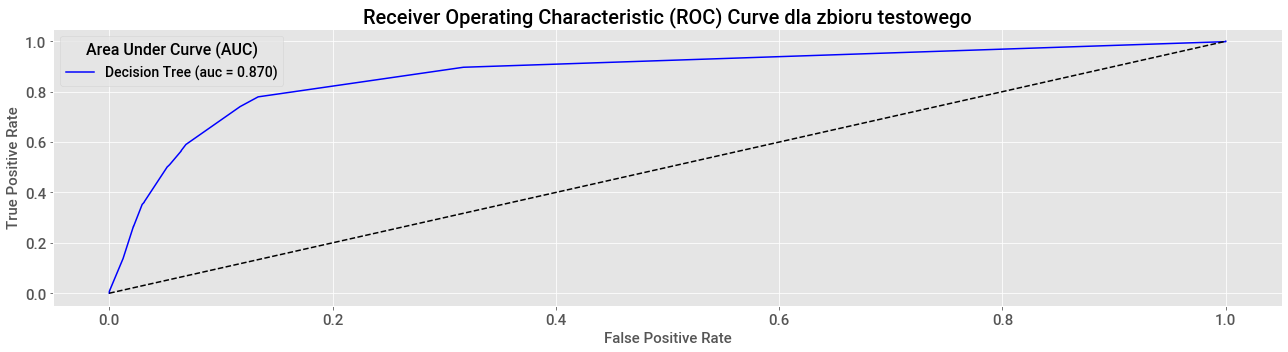

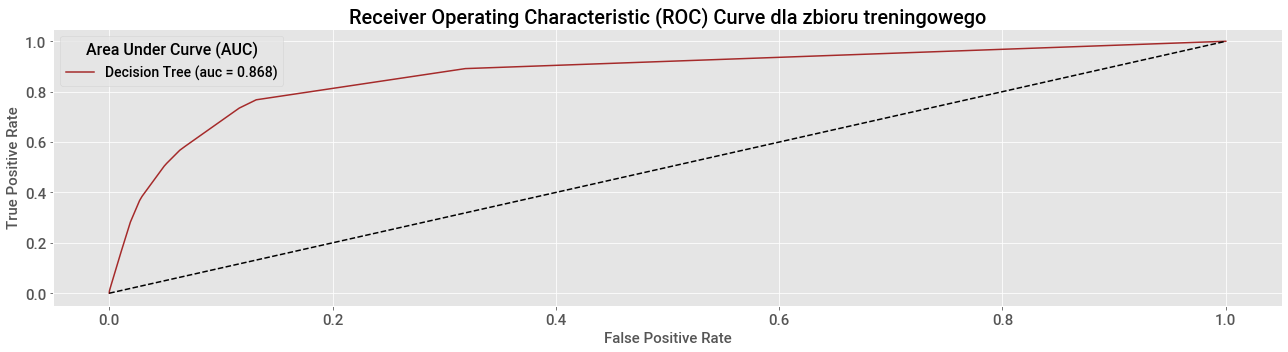

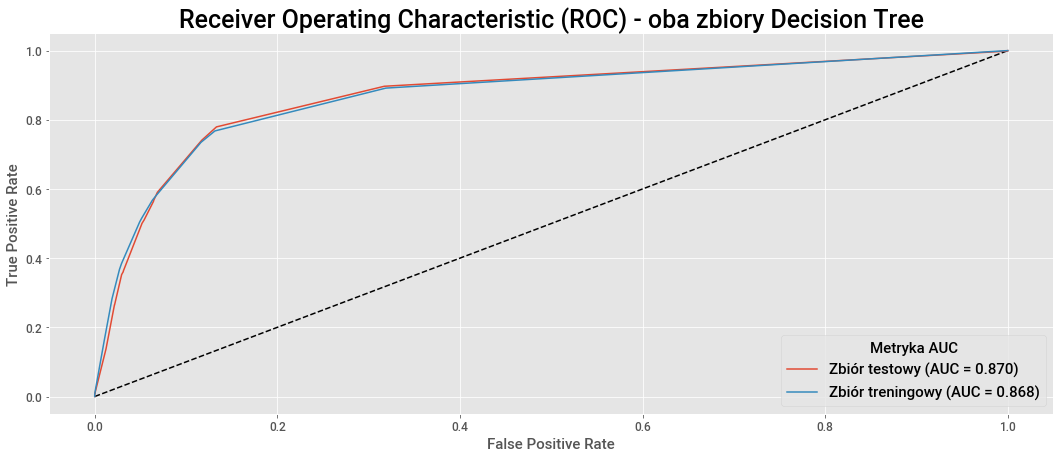

In [354]:
#Using a pre-built function to generate ROC curves for train adn test datasets
rcParams["figure.figsize"] = 18,5
plot_roc_cur(model = DT, X = X_test_DT, y = y_test_DT, df="testowy", color="blue", model_name = "Decision Tree")
plot_roc_cur(model = DT, X = X_train_DT, y = y_train_DT, df="treningowy", color="brown", model_name = "Decision Tree")

#Using the created function to compare ROC curves and AUC metrics on 1 graph
compar_roc(X_test = X_test_DT,
           y_test = y_test_DT,
           X_train = X_train_DT,
           y_train = y_train_DT,
           model_name = "Decision Tree",
           model = DT)

In [355]:
#Probabilities
y_prob_dt = DT.predict_proba(X_test_DT)

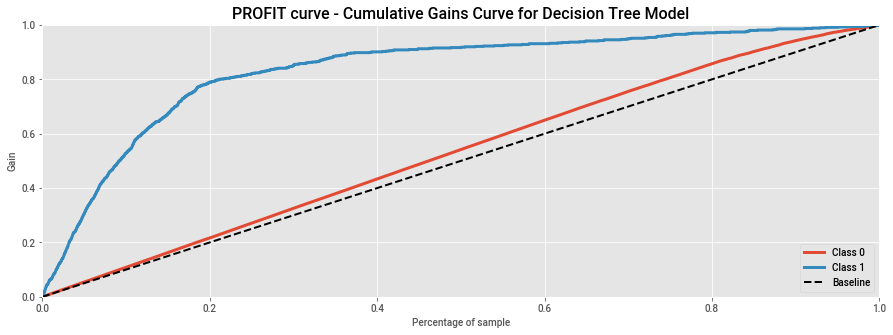

In [356]:
#Gains curve
skplt.metrics.plot_cumulative_gain(y_test_DT,
                                   y_prob_dt,
                                   figsize=(15,5),
                                   title_fontsize=16,
                                   text_fontsize=10,
                                   title='PROFIT curve - Cumulative Gains Curve for Decision Tree Model')
plt.show()

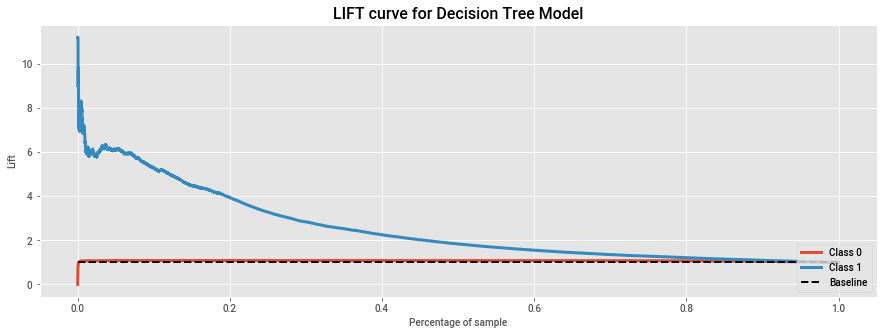

In [357]:
#LIFT curve
skplt.metrics.plot_lift_curve(y_test_DT,
                              y_prob_dt,
                              figsize=(15,5),
                              title_fontsize=16,
                              text_fontsize=10,
                              title='LIFT curve for Decision Tree Model')
plt.show()

# 10. XGBoost - ML model

## 10.1 Tuning of hiper parameters - loop

In [212]:
#Split dataset into independent variables and target variable
X_XGB = data.loc[:, data.columns != "y"].columns.tolist()
y_XGB = data.loc[:, data.columns == "y"].columns.tolist()

In [213]:
#Wrapper for cross validation of XGBoost
def CVTestXGB(nFolds = 5, randomState=20213, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    #Lists for storing results
    testResults = []
    trainResults = []
    predictions = []
    indices = []

    #Loop validating the model on successive folds
    for train_XGB, test_XGB in kf.split(data.index.values):
        #Preparation of estimator
        XGB = XGBClassifier(*args, **kwargs, random_state=randomState, n_jobs=-1, verbosity=0)
        #Training of XGBoost model
        XGB.fit(data.iloc[train_XGB][X_XGB], data.iloc[train_XGB][y_XGB])

        #Prediction on train adn test datasets
        predictions_train = XGB.predict_proba(data.iloc[train_XGB][X_XGB])[:,1]
        predictions_test = XGB.predict_proba(data.iloc[test_XGB][X_XGB])[:,1]
        
        #Retention of forecast information for a given folds
        predictions.append(predictions_test.tolist().copy())
        
        #Indexes
        indices.append(data.iloc[test_XGB].index.tolist().copy())
        
        #Calculation of the AUC metric for training and test set predictions
        trainScore = roc_auc_score((data[y_XGB].iloc[train_XGB]==1).astype(int), predictions_train)
        testScore = roc_auc_score((data[y_XGB].iloc[test_XGB]==1).astype(int), predictions_test)
        
        #Saving results from training and test datasets
        trainResults.append(trainScore)
        testResults.append(testScore)
        
    return trainResults, testResults, predictions, indices

In [214]:
#A loop to find the best configuration of XGBoost hyper parameters

#Lists on hyper parameter values
eta_list = list()
max_depth_list = list()
subsample_list = list()
colsample_bytree_list = list()
colsample_bylevel_list = list()
gamma_list = list()
min_child_weight_list = list()
rate_drop_list = list()
skip_drop_list = list()
mean_TRAIN_list = list()
mean_TEST_list = list()

#Loop with hyper parameters
for eta in [0.01, 0.02, 0.03, 0.5]: 
    for max_depth in [5, 10, 20]: 
        for subsample in [0.7, 1]: 
            for colsample_bytree in [0.7, 1]:
                for colsample_bylevel in [0.7, 1]:
                    for gamma in [0, 5]:
                        for min_child_weight in [0, 1]:
                            for rate_drop in [0, 0.2]:
                                for skip_drop in [0, 0.5]:
                                    trainResults, testResults, predictions, indices = CVTestXGB(eta=eta,
                                                                                            max_depth=max_depth,
                                                                                            subsample=subsample,
                                                                                            colsample_bytree=colsample_bytree,
                                                                                            colsample_bylevel=colsample_bylevel,
                                                                                            gamma=gamma,
                                                                                            min_child_weight=min_child_weight,
                                                                                            rate_drop=rate_drop,
                                                                                            skip_drop=skip_drop)
                                    #Adding values of hyper parameters to lists
                                    eta_list.append(eta)
                                    max_depth_list.append(max_depth)
                                    subsample_list.append(subsample)
                                    colsample_bytree_list.append(colsample_bytree)
                                    colsample_bylevel_list.append(colsample_bylevel)
                                    gamma_list.append(gamma)
                                    min_child_weight_list.append(min_child_weight)
                                    rate_drop_list.append(rate_drop)
                                    skip_drop_list.append(skip_drop)
                                    mean_TRAIN_list.append(np.mean(trainResults))
                                    mean_TEST_list.append(np.mean(testResults))
                
                                    #Display of mean scores for training and test set from 5 folds
                                    #at different hyper parameter configurations.
                                    print(eta, "||",
                                    max_depth,"||",
                                    subsample, "||",
                                    colsample_bytree, "||",
                                    colsample_bylevel, "||",
                                    gamma, "||",
                                    min_child_weight, "||",
                                    rate_drop, "||",
                                    skip_drop, "||",
                                    np.mean(testResults), "||",
                                    np.mean(trainResults), "||",
                                    (np.mean(trainResults) - np.mean(testResults)))
      
                                    #Saving results of hyper parameter tuning to Data Frame
                                    df_xgb = pd.DataFrame()
                                    df_xgb["eta"] =  eta_list
                                    df_xgb["max_depth"] = max_depth_list
                                    df_xgb["subsample"] = subsample_list
                                    df_xgb["colsample_bytree"] = colsample_bytree_list
                                    df_xgb["colsample_bylevel"] = colsample_bylevel_list
                                    df_xgb["gamma"] = gamma_list
                                    df_xgb["min_child_weight"] = min_child_weight_list
                                    df_xgb["rate_drop"] = rate_drop_list
                                    df_xgb["skip_drop"] = skip_drop_list
                                    df_xgb["mean_TEST"] = mean_TEST_list
                                    df_xgb["mean_TRAIN"] = mean_TRAIN_list
                                    df_xgb["TRAIN_TEST_difference"] = df_xgb["mean_TRAIN"] - df_xgb["mean_TEST"]

0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0 || 0 || 0.9359027744941818 || 0.9412589182653821 || 0.005356143771200306
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9359027744941818 || 0.9412589182653821 || 0.005356143771200306
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0 || 0.9359027744941818 || 0.9412589182653821 || 0.005356143771200306
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9359027744941818 || 0.9412589182653821 || 0.005356143771200306
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0 || 0 || 0.9359146546656095 || 0.9411583476791581 || 0.005243693013548545
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9359146546656095 || 0.9411583476791581 || 0.005243693013548545
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0 || 0.9359146546656095 || 0.9411583476791581 || 0.005243693013548545
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9359146546656095 || 0.9411583476791581 || 0.005243693013548545
0.01 || 5 || 0.7 || 0.7 || 0.7 |

0.01 || 5 || 1 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0 || 0.9347361588820362 || 0.9401439549950119 || 0.005407796112975705
0.01 || 5 || 1 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9347361588820362 || 0.9401439549950119 || 0.005407796112975705
0.01 || 5 || 1 || 0.7 || 0.7 || 5 || 0 || 0 || 0 || 0.9344179268789773 || 0.9387173370989957 || 0.004299410220018451
0.01 || 5 || 1 || 0.7 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9344179268789773 || 0.9387173370989957 || 0.004299410220018451
0.01 || 5 || 1 || 0.7 || 0.7 || 5 || 0 || 0.2 || 0 || 0.9344179268789773 || 0.9387173370989957 || 0.004299410220018451
0.01 || 5 || 1 || 0.7 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9344179268789773 || 0.9387173370989957 || 0.004299410220018451
0.01 || 5 || 1 || 0.7 || 0.7 || 5 || 1 || 0 || 0 || 0.9343772133973399 || 0.9386913215468032 || 0.004314108149463314
0.01 || 5 || 1 || 0.7 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9343772133973399 || 0.9386913215468032 || 0.004314108149463314
0.01 || 5 || 1 || 0.7 || 0.7 || 5 || 1 || 0.2 ||

0.01 || 10 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0 || 0 || 0.9389170415580097 || 0.9481875705178716 || 0.009270528959861912
0.01 || 10 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9389170415580097 || 0.9481875705178716 || 0.009270528959861912
0.01 || 10 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0 || 0.9389170415580097 || 0.9481875705178716 || 0.009270528959861912
0.01 || 10 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.9389170415580097 || 0.9481875705178716 || 0.009270528959861912
0.01 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0 || 0 || 0.9390964874811687 || 0.9681427670425282 || 0.029046279561359523
0.01 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0 || 0.5 || 0.9390964874811687 || 0.9681427670425282 || 0.029046279561359523
0.01 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0.2 || 0 || 0.9390964874811687 || 0.9681427670425282 || 0.029046279561359523
0.01 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9390964874811687 || 0.9681427670425282 || 0.029046279561359523
0.01 || 10 || 0.7 || 0.7 || 1 ||

0.01 || 10 || 1 || 0.7 || 1 || 0 || 0 || 0 || 0.5 || 0.9375785864480608 || 0.9688562856452908 || 0.03127769919723
0.01 || 10 || 1 || 0.7 || 1 || 0 || 0 || 0.2 || 0 || 0.9375785864480608 || 0.9688562856452908 || 0.03127769919723
0.01 || 10 || 1 || 0.7 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9375785864480608 || 0.9688562856452908 || 0.03127769919723
0.01 || 10 || 1 || 0.7 || 1 || 0 || 1 || 0 || 0 || 0.9376695077045583 || 0.9652598436324243 || 0.027590335927866083
0.01 || 10 || 1 || 0.7 || 1 || 0 || 1 || 0 || 0.5 || 0.9376695077045583 || 0.9652598436324243 || 0.027590335927866083
0.01 || 10 || 1 || 0.7 || 1 || 0 || 1 || 0.2 || 0 || 0.9376695077045583 || 0.9652598436324243 || 0.027590335927866083
0.01 || 10 || 1 || 0.7 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9376695077045583 || 0.9652598436324243 || 0.027590335927866083
0.01 || 10 || 1 || 0.7 || 1 || 5 || 0 || 0 || 0 || 0.9380660514046799 || 0.9484791936018825 || 0.010413142197202574
0.01 || 10 || 1 || 0.7 || 1 || 5 || 0 || 0 || 0.5 || 0.9380660514046

0.01 || 20 || 0.7 || 0.7 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9382605166655438 || 0.9743752127132606 || 0.03611469604771678
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0 || 0 || 0.9388076679918889 || 0.9507788223565019 || 0.011971154364613046
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0 || 0.5 || 0.9388076679918889 || 0.9507788223565019 || 0.011971154364613046
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0.2 || 0 || 0.9388076679918889 || 0.9507788223565019 || 0.011971154364613046
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9388076679918889 || 0.9507788223565019 || 0.011971154364613046
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 1 || 0 || 0 || 0.9390226082043422 || 0.9505954507584509 || 0.01157284255410862
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 1 || 0 || 0.5 || 0.9390226082043422 || 0.9505954507584509 || 0.01157284255410862
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 1 || 0.2 || 0 || 0.9390226082043422 || 0.9505954507584509 || 0.01157284255410862
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 1 || 0

0.01 || 20 || 1 || 0.7 || 1 || 5 || 1 || 0 || 0.5 || 0.9378471975136071 || 0.9513479993135251 || 0.013500801799917972
0.01 || 20 || 1 || 0.7 || 1 || 5 || 1 || 0.2 || 0 || 0.9378471975136071 || 0.9513479993135251 || 0.013500801799917972
0.01 || 20 || 1 || 0.7 || 1 || 5 || 1 || 0.2 || 0.5 || 0.9378471975136071 || 0.9513479993135251 || 0.013500801799917972
0.01 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0 || 0 || 0.936506003988233 || 0.9879721980747334 || 0.05146619408650033
0.01 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0 || 0.5 || 0.936506003988233 || 0.9879721980747334 || 0.05146619408650033
0.01 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0.2 || 0 || 0.936506003988233 || 0.9879721980747334 || 0.05146619408650033
0.01 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.936506003988233 || 0.9879721980747334 || 0.05146619408650033
0.01 || 20 || 1 || 1 || 0.7 || 0 || 1 || 0 || 0 || 0.9380536265161851 || 0.9803161778334826 || 0.0422625513172975
0.01 || 20 || 1 || 1 || 0.7 || 0 || 1 || 0 || 0.5 || 0.93805362651

0.02 || 5 || 0.7 || 1 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9391775295792254 || 0.9452515071280082 || 0.006073977548782805
0.02 || 5 || 0.7 || 1 || 0.7 || 0 || 1 || 0 || 0 || 0.9391868599015337 || 0.9451482571886324 || 0.005961397287098658
0.02 || 5 || 0.7 || 1 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9391868599015337 || 0.9451482571886324 || 0.005961397287098658
0.02 || 5 || 0.7 || 1 || 0.7 || 0 || 1 || 0.2 || 0 || 0.9391868599015337 || 0.9451482571886324 || 0.005961397287098658
0.02 || 5 || 0.7 || 1 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9391868599015337 || 0.9451482571886324 || 0.005961397287098658
0.02 || 5 || 0.7 || 1 || 0.7 || 5 || 0 || 0 || 0 || 0.9388765355633719 || 0.9436108058446816 || 0.004734270281309683
0.02 || 5 || 0.7 || 1 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9388765355633719 || 0.9436108058446816 || 0.004734270281309683
0.02 || 5 || 0.7 || 1 || 0.7 || 5 || 0 || 0.2 || 0 || 0.9388765355633719 || 0.9436108058446816 || 0.004734270281309683
0.02 || 5 || 0.7 || 1 || 0.7 || 5 || 0 || 0.2 ||

0.02 || 5 || 1 || 1 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9389009397112739 || 0.9439768654246139 || 0.005075925713340035
0.02 || 5 || 1 || 1 || 0.7 || 5 || 0 || 0.2 || 0 || 0.9389009397112739 || 0.9439768654246139 || 0.005075925713340035
0.02 || 5 || 1 || 1 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9389009397112739 || 0.9439768654246139 || 0.005075925713340035
0.02 || 5 || 1 || 1 || 0.7 || 5 || 1 || 0 || 0 || 0.938866580390305 || 0.943936495431636 || 0.00506991504133103
0.02 || 5 || 1 || 1 || 0.7 || 5 || 1 || 0 || 0.5 || 0.938866580390305 || 0.943936495431636 || 0.00506991504133103
0.02 || 5 || 1 || 1 || 0.7 || 5 || 1 || 0.2 || 0 || 0.938866580390305 || 0.943936495431636 || 0.00506991504133103
0.02 || 5 || 1 || 1 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.938866580390305 || 0.943936495431636 || 0.00506991504133103
0.02 || 5 || 1 || 1 || 1 || 0 || 0 || 0 || 0 || 0.9376321199488278 || 0.9437256036532553 || 0.006093483704427527
0.02 || 5 || 1 || 1 || 1 || 0 || 0 || 0 || 0.5 || 0.9376321199488278 || 0.9437

0.02 || 10 || 0.7 || 1 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.9421075711685368 || 0.9537609768287332 || 0.011653405660196348
0.02 || 10 || 0.7 || 1 || 1 || 0 || 0 || 0 || 0 || 0.9401506274944496 || 0.9763361122106728 || 0.03618548471622329
0.02 || 10 || 0.7 || 1 || 1 || 0 || 0 || 0 || 0.5 || 0.9401506274944496 || 0.9763361122106728 || 0.03618548471622329
0.02 || 10 || 0.7 || 1 || 1 || 0 || 0 || 0.2 || 0 || 0.9401506274944496 || 0.9763361122106728 || 0.03618548471622329
0.02 || 10 || 0.7 || 1 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9401506274944496 || 0.9763361122106728 || 0.03618548471622329
0.02 || 10 || 0.7 || 1 || 1 || 0 || 1 || 0 || 0 || 0.9402191533020631 || 0.9712346508157819 || 0.031015497513718793
0.02 || 10 || 0.7 || 1 || 1 || 0 || 1 || 0 || 0.5 || 0.9402191533020631 || 0.9712346508157819 || 0.031015497513718793
0.02 || 10 || 0.7 || 1 || 1 || 0 || 1 || 0.2 || 0 || 0.9402191533020631 || 0.9712346508157819 || 0.031015497513718793
0.02 || 10 || 0.7 || 1 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9

0.02 || 10 || 1 || 1 || 1 || 0 || 1 || 0 || 0.5 || 0.9376997115617367 || 0.9719585557801693 || 0.034258844218432616
0.02 || 10 || 1 || 1 || 1 || 0 || 1 || 0.2 || 0 || 0.9376997115617367 || 0.9719585557801693 || 0.034258844218432616
0.02 || 10 || 1 || 1 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9376997115617367 || 0.9719585557801693 || 0.034258844218432616
0.02 || 10 || 1 || 1 || 1 || 5 || 0 || 0 || 0 || 0.9401677907259126 || 0.9521778322899745 || 0.012010041564061935
0.02 || 10 || 1 || 1 || 1 || 5 || 0 || 0 || 0.5 || 0.9401677907259126 || 0.9521778322899745 || 0.012010041564061935
0.02 || 10 || 1 || 1 || 1 || 5 || 0 || 0.2 || 0 || 0.9401677907259126 || 0.9521778322899745 || 0.012010041564061935
0.02 || 10 || 1 || 1 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9401677907259126 || 0.9521778322899745 || 0.012010041564061935
0.02 || 10 || 1 || 1 || 1 || 5 || 1 || 0 || 0 || 0.9402162785618111 || 0.9520212406553512 || 0.011804962093540095
0.02 || 10 || 1 || 1 || 1 || 5 || 1 || 0 || 0.5 || 0.9402162785618111 ||

0.02 || 20 || 0.7 || 1 || 1 || 5 || 0 || 0.2 || 0 || 0.9411398121558108 || 0.9574366247700373 || 0.016296812614226552
0.02 || 20 || 0.7 || 1 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9411398121558108 || 0.9574366247700373 || 0.016296812614226552
0.02 || 20 || 0.7 || 1 || 1 || 5 || 1 || 0 || 0 || 0.9413444713069348 || 0.9568547899278895 || 0.015510318620954755
0.02 || 20 || 0.7 || 1 || 1 || 5 || 1 || 0 || 0.5 || 0.9413444713069348 || 0.9568547899278895 || 0.015510318620954755
0.02 || 20 || 0.7 || 1 || 1 || 5 || 1 || 0.2 || 0 || 0.9413444713069348 || 0.9568547899278895 || 0.015510318620954755
0.02 || 20 || 0.7 || 1 || 1 || 5 || 1 || 0.2 || 0.5 || 0.9413444713069348 || 0.9568547899278895 || 0.015510318620954755
0.02 || 20 || 1 || 0.7 || 0.7 || 0 || 0 || 0 || 0 || 0.9361659154985098 || 0.9920454611488013 || 0.05587954565029152
0.02 || 20 || 1 || 0.7 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9361659154985098 || 0.9920454611488013 || 0.05587954565029152
0.02 || 20 || 1 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0 ||

0.03 || 5 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9405552826873192 || 0.9472555702228792 || 0.006700287535559957
0.03 || 5 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0 || 0.9405552826873192 || 0.9472555702228792 || 0.006700287535559957
0.03 || 5 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9405552826873192 || 0.9472555702228792 || 0.006700287535559957
0.03 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0 || 0 || 0.9405482984491134 || 0.9470874646420103 || 0.006539166192896961
0.03 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9405482984491134 || 0.9470874646420103 || 0.006539166192896961
0.03 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0 || 0.9405482984491134 || 0.9470874646420103 || 0.006539166192896961
0.03 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9405482984491134 || 0.9470874646420103 || 0.006539166192896961
0.03 || 5 || 0.7 || 0.7 || 0.7 || 5 || 0 || 0 || 0 || 0.9401253730932184 || 0.9450661246338139 || 0.004940751540595478
0.03 || 5 || 0.7 || 0.7 || 0.7 |

0.03 || 5 || 1 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9397951243425492 || 0.946758027794582 || 0.006962903452032765
0.03 || 5 || 1 || 0.7 || 0.7 || 5 || 0 || 0 || 0 || 0.9396041413072875 || 0.944958321141781 || 0.005354179834493489
0.03 || 5 || 1 || 0.7 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9396041413072875 || 0.944958321141781 || 0.005354179834493489
0.03 || 5 || 1 || 0.7 || 0.7 || 5 || 0 || 0.2 || 0 || 0.9396041413072875 || 0.944958321141781 || 0.005354179834493489
0.03 || 5 || 1 || 0.7 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9396041413072875 || 0.944958321141781 || 0.005354179834493489
0.03 || 5 || 1 || 0.7 || 0.7 || 5 || 1 || 0 || 0 || 0.939579640368468 || 0.9449480048183219 || 0.005368364449853891
0.03 || 5 || 1 || 0.7 || 0.7 || 5 || 1 || 0 || 0.5 || 0.939579640368468 || 0.9449480048183219 || 0.005368364449853891
0.03 || 5 || 1 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0 || 0.939579640368468 || 0.9449480048183219 || 0.005368364449853891
0.03 || 5 || 1 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0.5 || 

0.03 || 10 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9424511502359355 || 0.9538791224735934 || 0.011427972237657902
0.03 || 10 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0 || 0.9424511502359355 || 0.9538791224735934 || 0.011427972237657902
0.03 || 10 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.9424511502359355 || 0.9538791224735934 || 0.011427972237657902
0.03 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0 || 0 || 0.9414283717018652 || 0.9791823558328201 || 0.037753984130954876
0.03 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0 || 0.5 || 0.9414283717018652 || 0.9791823558328201 || 0.037753984130954876
0.03 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0.2 || 0 || 0.9414283717018652 || 0.9791823558328201 || 0.037753984130954876
0.03 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9414283717018652 || 0.9791823558328201 || 0.037753984130954876
0.03 || 10 || 0.7 || 0.7 || 1 || 0 || 1 || 0 || 0 || 0.9415707394718131 || 0.9738104641286174 || 0.03223972465680425
0.03 || 10 || 0.7 || 0.7 || 1 || 0 

0.03 || 10 || 1 || 0.7 || 1 || 0 || 0 || 0.2 || 0 || 0.9397885261196244 || 0.9808271339449698 || 0.04103860782534541
0.03 || 10 || 1 || 0.7 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9397885261196244 || 0.9808271339449698 || 0.04103860782534541
0.03 || 10 || 1 || 0.7 || 1 || 0 || 1 || 0 || 0 || 0.9403409696929902 || 0.9761493576962128 || 0.03580838800322261
0.03 || 10 || 1 || 0.7 || 1 || 0 || 1 || 0 || 0.5 || 0.9403409696929902 || 0.9761493576962128 || 0.03580838800322261
0.03 || 10 || 1 || 0.7 || 1 || 0 || 1 || 0.2 || 0 || 0.9403409696929902 || 0.9761493576962128 || 0.03580838800322261
0.03 || 10 || 1 || 0.7 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9403409696929902 || 0.9761493576962128 || 0.03580838800322261
0.03 || 10 || 1 || 0.7 || 1 || 5 || 0 || 0 || 0 || 0.9420983249336443 || 0.9548822425591499 || 0.01278391762550557
0.03 || 10 || 1 || 0.7 || 1 || 5 || 0 || 0 || 0.5 || 0.9420983249336443 || 0.9548822425591499 || 0.01278391762550557
0.03 || 10 || 1 || 0.7 || 1 || 5 || 0 || 0.2 || 0 || 0.942098324

0.03 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0 || 0 || 0.942234680109784 || 0.9579845411367423 || 0.0157498610269583
0.03 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0 || 0.5 || 0.942234680109784 || 0.9579845411367423 || 0.0157498610269583
0.03 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0.2 || 0 || 0.942234680109784 || 0.9579845411367423 || 0.0157498610269583
0.03 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0.2 || 0.5 || 0.942234680109784 || 0.9579845411367423 || 0.0157498610269583
0.03 || 20 || 0.7 || 0.7 || 1 || 5 || 1 || 0 || 0 || 0.9421952631029328 || 0.9573387970067344 || 0.015143533903801631
0.03 || 20 || 0.7 || 0.7 || 1 || 5 || 1 || 0 || 0.5 || 0.9421952631029328 || 0.9573387970067344 || 0.015143533903801631
0.03 || 20 || 0.7 || 0.7 || 1 || 5 || 1 || 0.2 || 0 || 0.9421952631029328 || 0.9573387970067344 || 0.015143533903801631
0.03 || 20 || 0.7 || 0.7 || 1 || 5 || 1 || 0.2 || 0.5 || 0.9421952631029328 || 0.9573387970067344 || 0.015143533903801631
0.03 || 20 || 0.7 || 1 || 0.7 || 0 || 0 || 0 || 0 ||

0.03 || 20 || 1 || 0.7 || 1 || 5 || 1 || 0.2 || 0 || 0.9420764147080927 || 0.9590871713056325 || 0.01701075659753981
0.03 || 20 || 1 || 0.7 || 1 || 5 || 1 || 0.2 || 0.5 || 0.9420764147080927 || 0.9590871713056325 || 0.01701075659753981
0.03 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0 || 0 || 0.9365419820515392 || 0.9968848516148439 || 0.0603428695633047
0.03 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9365419820515392 || 0.9968848516148439 || 0.0603428695633047
0.03 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0.2 || 0 || 0.9365419820515392 || 0.9968848516148439 || 0.0603428695633047
0.03 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9365419820515392 || 0.9968848516148439 || 0.0603428695633047
0.03 || 20 || 1 || 1 || 0.7 || 0 || 1 || 0 || 0 || 0.9378901993294713 || 0.9926212961257581 || 0.05473109679628685
0.03 || 20 || 1 || 1 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9378901993294713 || 0.9926212961257581 || 0.05473109679628685
0.03 || 20 || 1 || 1 || 0.7 || 0 || 1 || 0.2 || 0 || 0.9378901993294

0.5 || 5 || 0.7 || 1 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9351613811113895 || 0.9754072601091164 || 0.040245878997726914
0.5 || 5 || 0.7 || 1 || 0.7 || 0 || 1 || 0.2 || 0 || 0.9351613811113895 || 0.9754072601091164 || 0.040245878997726914
0.5 || 5 || 0.7 || 1 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9351613811113895 || 0.9754072601091164 || 0.040245878997726914
0.5 || 5 || 0.7 || 1 || 0.7 || 5 || 0 || 0 || 0 || 0.9395306135845825 || 0.9603929369891888 || 0.020862323404606364
0.5 || 5 || 0.7 || 1 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9395306135845825 || 0.9603929369891888 || 0.020862323404606364
0.5 || 5 || 0.7 || 1 || 0.7 || 5 || 0 || 0.2 || 0 || 0.9395306135845825 || 0.9603929369891888 || 0.020862323404606364
0.5 || 5 || 0.7 || 1 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9395306135845825 || 0.9603929369891888 || 0.020862323404606364
0.5 || 5 || 0.7 || 1 || 0.7 || 5 || 1 || 0 || 0 || 0.9399174863762679 || 0.9603105031079657 || 0.0203930167316978
0.5 || 5 || 0.7 || 1 || 0.7 || 5 || 1 || 0 || 0.5 || 0.939

0.5 || 5 || 1 || 1 || 0.7 || 5 || 1 || 0 || 0 || 0.9415999431586222 || 0.9567583485795303 || 0.015158405420908183
0.5 || 5 || 1 || 1 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9415999431586222 || 0.9567583485795303 || 0.015158405420908183
0.5 || 5 || 1 || 1 || 0.7 || 5 || 1 || 0.2 || 0 || 0.9415999431586222 || 0.9567583485795303 || 0.015158405420908183
0.5 || 5 || 1 || 1 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.9415999431586222 || 0.9567583485795303 || 0.015158405420908183
0.5 || 5 || 1 || 1 || 1 || 0 || 0 || 0 || 0 || 0.9360546235382857 || 0.98057224873716 || 0.044517625198874256
0.5 || 5 || 1 || 1 || 1 || 0 || 0 || 0 || 0.5 || 0.9360546235382857 || 0.98057224873716 || 0.044517625198874256
0.5 || 5 || 1 || 1 || 1 || 0 || 0 || 0.2 || 0 || 0.9360546235382857 || 0.98057224873716 || 0.044517625198874256
0.5 || 5 || 1 || 1 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9360546235382857 || 0.98057224873716 || 0.044517625198874256
0.5 || 5 || 1 || 1 || 1 || 0 || 1 || 0 || 0 || 0.9367797715101093 || 0.9768587409771007 

0.5 || 10 || 0.7 || 1 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9253138373162958 || 0.9999998463634675 || 0.07468600904717171
0.5 || 10 || 0.7 || 1 || 1 || 0 || 1 || 0 || 0 || 0.9225154136106308 || 0.9999100038114854 || 0.0773945902008546
0.5 || 10 || 0.7 || 1 || 1 || 0 || 1 || 0 || 0.5 || 0.9225154136106308 || 0.9999100038114854 || 0.0773945902008546
0.5 || 10 || 0.7 || 1 || 1 || 0 || 1 || 0.2 || 0 || 0.9225154136106308 || 0.9999100038114854 || 0.0773945902008546
0.5 || 10 || 0.7 || 1 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9225154136106308 || 0.9999100038114854 || 0.0773945902008546
0.5 || 10 || 0.7 || 1 || 1 || 5 || 0 || 0 || 0 || 0.9349067778264197 || 0.9762847167645573 || 0.04137793893813757
0.5 || 10 || 0.7 || 1 || 1 || 5 || 0 || 0 || 0.5 || 0.9349067778264197 || 0.9762847167645573 || 0.04137793893813757
0.5 || 10 || 0.7 || 1 || 1 || 5 || 0 || 0.2 || 0 || 0.9349067778264197 || 0.9762847167645573 || 0.04137793893813757
0.5 || 10 || 0.7 || 1 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9349067778264197 || 

0.5 || 10 || 1 || 1 || 1 || 5 || 0 || 0.2 || 0 || 0.9407712112270525 || 0.9643128561206448 || 0.02354164489359223
0.5 || 10 || 1 || 1 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9407712112270525 || 0.9643128561206448 || 0.02354164489359223
0.5 || 10 || 1 || 1 || 1 || 5 || 1 || 0 || 0 || 0.9407238006730028 || 0.9639429939195953 || 0.023219193246592496
0.5 || 10 || 1 || 1 || 1 || 5 || 1 || 0 || 0.5 || 0.9407238006730028 || 0.9639429939195953 || 0.023219193246592496
0.5 || 10 || 1 || 1 || 1 || 5 || 1 || 0.2 || 0 || 0.9407238006730028 || 0.9639429939195953 || 0.023219193246592496
0.5 || 10 || 1 || 1 || 1 || 5 || 1 || 0.2 || 0.5 || 0.9407238006730028 || 0.9639429939195953 || 0.023219193246592496
0.5 || 20 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0 || 0 || 0.9263626028492207 || 0.9999999683940135 || 0.07363736554479283
0.5 || 20 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9263626028492207 || 0.9999999683940135 || 0.07363736554479283
0.5 || 20 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0 || 0.92636260284922

0.5 || 20 || 1 || 0.7 || 0.7 || 0 || 0 || 0 || 0 || 0.9277393352317391 || 0.9999999683940135 || 0.07226063316227438
0.5 || 20 || 1 || 0.7 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9277393352317391 || 0.9999999683940135 || 0.07226063316227438
0.5 || 20 || 1 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0 || 0.9277393352317391 || 0.9999999683940135 || 0.07226063316227438
0.5 || 20 || 1 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9277393352317391 || 0.9999999683940135 || 0.07226063316227438
0.5 || 20 || 1 || 0.7 || 0.7 || 0 || 1 || 0 || 0 || 0.9242912539214014 || 0.9999999557351812 || 0.07570870181377976
0.5 || 20 || 1 || 0.7 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9242912539214014 || 0.9999999557351812 || 0.07570870181377976
0.5 || 20 || 1 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0 || 0.9242912539214014 || 0.9999999557351812 || 0.07570870181377976
0.5 || 20 || 1 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9242912539214014 || 0.9999999557351812 || 0.07570870181377976
0.5 || 20 || 1 || 0.7 || 0.7 || 5 || 0 || 0 || 0 || 0.93

In [215]:
#Sorting the results descending by the mean AUC score on the test set
df_xgb.sort_values(by="mean_TEST", ascending = False)

,eta,max_depth,subsample,colsample_bytree,colsample_bylevel,gamma,min_child_weight,rate_drop,skip_drop,mean_TEST,mean_TRAIN,TRAIN_TEST_difference
1064,0.03,20,0.7,1.0,0.7,5,0,0.0,0.0,0.943142,0.961240,0.018098
1067,0.03,20,0.7,1.0,0.7,5,0,0.2,0.5,0.943142,0.961240,0.018098
1065,0.03,20,0.7,1.0,0.7,5,0,0.0,0.5,0.943142,0.961240,0.018098
1066,0.03,20,0.7,1.0,0.7,5,0,0.2,0.0,0.943142,0.961240,0.018098
1071,0.03,20,0.7,1.0,0.7,5,1,0.2,0.5,0.943101,0.960582,0.017481
...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.50,20,0.7,1.0,0.7,0,1,0.2,0.5,0.921241,1.000000,0.078759
1428,0.50,20,0.7,0.7,1.0,0,1,0.0,0.0,0.920474,1.000000,0.079526
1429,0.50,20,0.7,0.7,1.0,0,1,0.0,0.5,0.920474,1.000000,0.079526
1430,0.50,20,0.7,0.7,1.0,0,1,0.2,0.0,0.920474,1.000000,0.079526


In [216]:
#Selection of the best hyper parameter configuration, where the score on folds >= 0.76 and the difference between sets <= 0.05
df_xgb[(df_xgb["mean_TEST"] >= 0.76) & (df_xgb["TRAIN_TEST_difference"] <= 0.05)].sort_values(by="mean_TEST", ascending = False)

,eta,max_depth,subsample,colsample_bytree,colsample_bylevel,gamma,min_child_weight,rate_drop,skip_drop,mean_TEST,mean_TRAIN,TRAIN_TEST_difference
1065,0.03,20,0.7,1.0,0.7,5,0,0.0,0.5,0.943142,0.961240,0.018098
1064,0.03,20,0.7,1.0,0.7,5,0,0.0,0.0,0.943142,0.961240,0.018098
1066,0.03,20,0.7,1.0,0.7,5,0,0.2,0.0,0.943142,0.961240,0.018098
1067,0.03,20,0.7,1.0,0.7,5,0,0.2,0.5,0.943142,0.961240,0.018098
1071,0.03,20,0.7,1.0,0.7,5,1,0.2,0.5,0.943101,0.960582,0.017481
...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.01,5,1.0,1.0,1.0,5,1,0.2,0.5,0.932291,0.936940,0.004649
375,0.01,20,1.0,1.0,1.0,0,1,0.2,0.5,0.930633,0.977316,0.046684
372,0.01,20,1.0,1.0,1.0,0,1,0.0,0.0,0.930633,0.977316,0.046684
374,0.01,20,1.0,1.0,1.0,0,1,0.2,0.0,0.930633,0.977316,0.046684


## 10.2 Tuning of parameters train_test_split - loop

In [323]:
#Split dataset into independent variables and target variable
X_XGB_tts = data.loc[:, data.columns != "y"]
y_XGB_tts = data.loc[:, data.columns == "y"]

#Loop to find the best combination of train split / test split based on AUC metric
for k in range(1, 10):
    X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB_tts,
                                                                        y_XGB_tts,
                                                                        test_size = 0.1*k,
                                                                        stratify = y_XGB_tts,
                                                                        random_state = 20214)
    
    #XGBoost with pre-selected hyper parameters
    XGB = xgb.sklearn.XGBClassifier(eta = 0.03,
                                    max_depth=20,
                                    subsample=0.7,
                                    colsample_bytree=1.0,
                                    colsample_bylevel=0.7,
                                    gamma=5,
                                    min_child_weight=0,
                                    rate_drop=0,
                                    skip_drop=0.5,
                                    verbosity=0)
    #Training the model for a loop
    XGB.fit(X = X_train_XGB, y = y_train_XGB)

    #Prediction on train and test datasets
    y_prob__test_xgb = XGB.predict_proba(X_test_XGB)[::,1]
    y_prob__train_xgb = XGB.predict_proba(X_train_XGB)[::,1]
    AUC_TEST_tuning_XGB = metrics.roc_auc_score(y_test_XGB, y_prob__test_xgb)
    AUC_TRAIN_tuning_XGB = metrics.roc_auc_score(y_train_XGB, y_prob__train_xgb)

    #Print of results
    print(f"test: {k/10}, Train AUC:", AUC_TRAIN_tuning_XGB,
          "Test AUC:", AUC_TEST_tuning_XGB)

test: 0.1, Train AUC: 0.9611272766079036 Test AUC: 0.944451369415201
test: 0.2, Train AUC: 0.96149438540372 Test AUC: 0.9398545179804856
test: 0.3, Train AUC: 0.9601892103616663 Test AUC: 0.9429462431291996
test: 0.4, Train AUC: 0.9611337939119875 Test AUC: 0.941938188348466
test: 0.5, Train AUC: 0.9612604627843977 Test AUC: 0.9423367163858153
test: 0.6, Train AUC: 0.9611448703052312 Test AUC: 0.9414387402105098
test: 0.7, Train AUC: 0.9630497868924004 Test AUC: 0.9399525717396164
test: 0.8, Train AUC: 0.9639141406524908 Test AUC: 0.9386736616056965
test: 0.9, Train AUC: 0.9591485418352588 Test AUC: 0.9356618381630526


## 10.3 Model building

In [324]:
#Split dataset into independent variables and target variable
X_XGB = data.loc[:, data.columns != "y"]
y_XGB = data.loc[:, data.columns == "y"]

#Split dataset to train and test datasets
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB,
                                                                    y_XGB,
                                                                    train_size = 0.7,
                                                                    test_size = 0.3,
                                                                    random_state = 20215,
                                                                    stratify = y_XGB)

#Hyper parameters of XGBoost classifier selected based on loop and AUC metrics
XGB = xgb.sklearn.XGBClassifier(eta = 0.03,
                                max_depth=5,
                                subsample=0.7,
                                colsample_bytree=0.7,
                                colsample_bylevel=1.0,
                                gamma=0,
                                min_child_weight=1,
                                rate_drop=0.2,
                                skip_drop=0.5,
                                verbosity=0)
#Training of XGBoost model
XGB = XGB.fit(X = X_train_XGB, y = y_train_XGB)

#Prediction on train and test datasets
TRAIN_pred_XGB = XGB.predict(X_train_XGB)
TEST_pred_XGB = XGB.predict(X_test_XGB)

## 10.4 Model evaluation

In [325]:
#Using a pre-built function to generate a confusion matrix
conf_matrix(model_name = "XGBoost",
            y_test = y_test_XGB,
            pred_test = TEST_pred_XGB)

Macierz pomyłek modelu: XGBoost
[[10517   171]
 [  713   335]]
----------------------------------------
True Negative: 10517
False Positive: 171
False Negative: 713
True Positive: 335
Poprawność predykcji 92.47 %


In [326]:
#Using a pre-built function to generate a classification report for the training and test sets
class_report(y_test = y_test_XGB,
             y_train = y_train_XGB,
             pred_test = TEST_pred_XGB,
             pred_train = TRAIN_pred_XGB,
             model_name = "XGBoost")

CLassification report dla modelu: XGBoost na zbiorze treningowym:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     24937
           1       0.70      0.35      0.46      2444

    accuracy                           0.93     27381
   macro avg       0.82      0.67      0.71     27381
weighted avg       0.92      0.93      0.92     27381

*******************************************************
CLassification report dla modelu: XGBoost na zbiorze testowym:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10688
           1       0.66      0.32      0.43      1048

    accuracy                           0.92     11736
   macro avg       0.80      0.65      0.70     11736
weighted avg       0.91      0.92      0.91     11736



In [327]:
#Using a pre-built function to generate a comparison of statistics on the training and test sets
stat_comparison(y_test = y_test_XGB,
                y_train = y_train_XGB,
                X_test = X_test_XGB, 
                X_train = X_train_XGB,
                pred_test = TEST_pred_XGB,
                pred_train = TRAIN_pred_XGB,
                model = XGB)

Porównanie statystyk na zbiorach treningowym i testowym:


,Accuracy,Precision,Recall,F1,AUC,Gini
Zbiór,,,,,,
treningowy,0.93,0.70,0.35,0.46,0.947456,0.89
testowy,0.92,0.66,0.32,0.43,0.945012,0.89


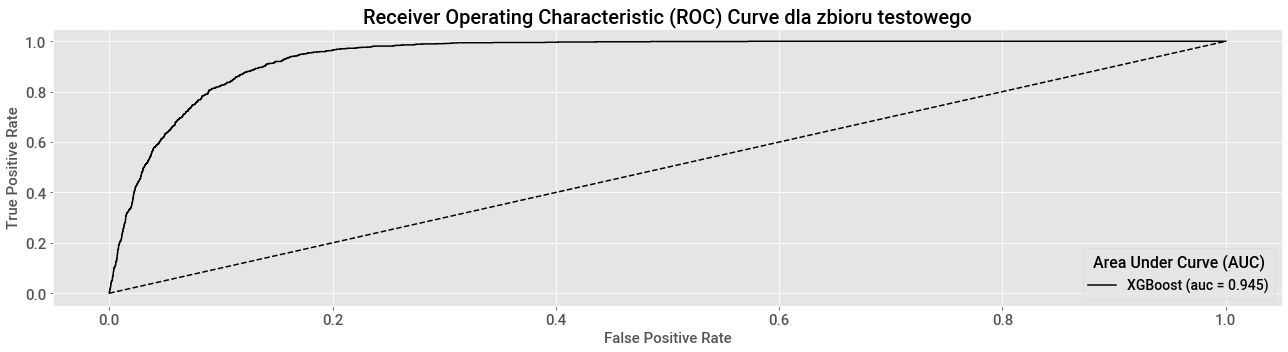

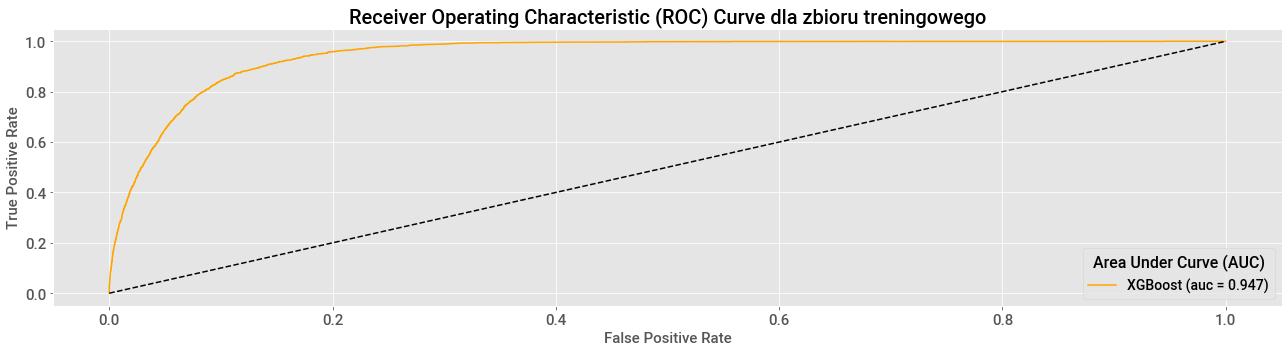

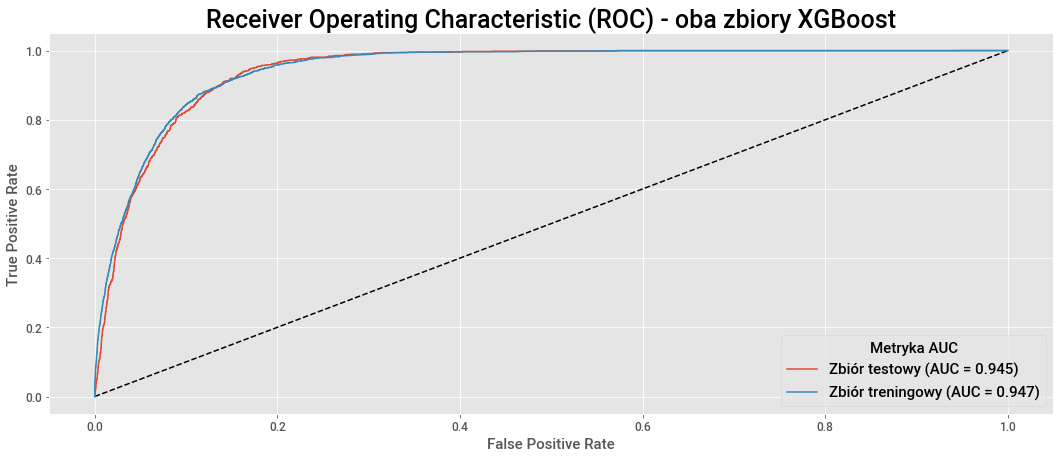

In [328]:
#Using a pre-built function to generate ROC curves on the training and test sets
rcParams["figure.figsize"] = 18,5
plot_roc_cur(model = XGB, X = X_test_XGB, y = y_test_XGB, df="testowy", color="black", model_name = "XGBoost")
plot_roc_cur(model = XGB, X = X_train_XGB, y = y_train_XGB, df="treningowy", color="orange", model_name = "XGBoost")

#Using the created function to compare ROC curves and AUC metrics on 1 graph
compar_roc(X_test = X_test_XGB,
           y_test = y_test_XGB,
           X_train = X_train_XGB,
           y_train = y_train_XGB,
           model_name = "XGBoost",
           model = XGB)

In [329]:
#Probabilities
y_prob = XGB.predict_proba(X_test_XGB)

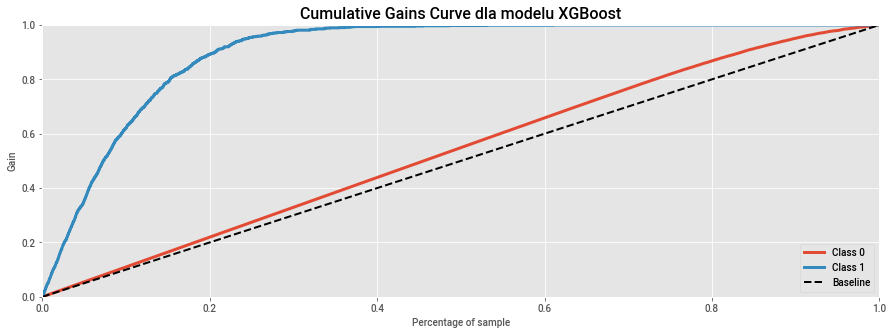

In [330]:
#Gains curve
skplt.metrics.plot_cumulative_gain(y_test_XGB,
                                   y_prob,
                                   figsize=(15,5),
                                   title_fontsize=16,
                                   text_fontsize=10,
                                   title="Cumulative Gains Curve dla modelu XGBoost")
plt.show()

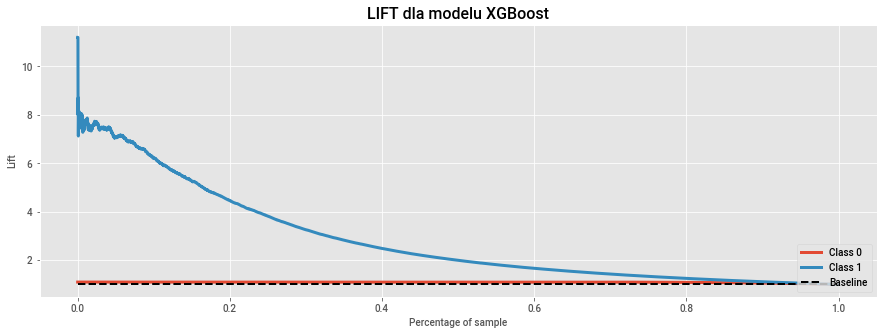

In [331]:
#LIFT curve
skplt.metrics.plot_lift_curve(y_test_XGB,
                              y_prob,
                              figsize=(15,5),
                              title_fontsize=16,
                              text_fontsize=10,
                              title="LIFT dla modelu XGBoost")
plt.show()

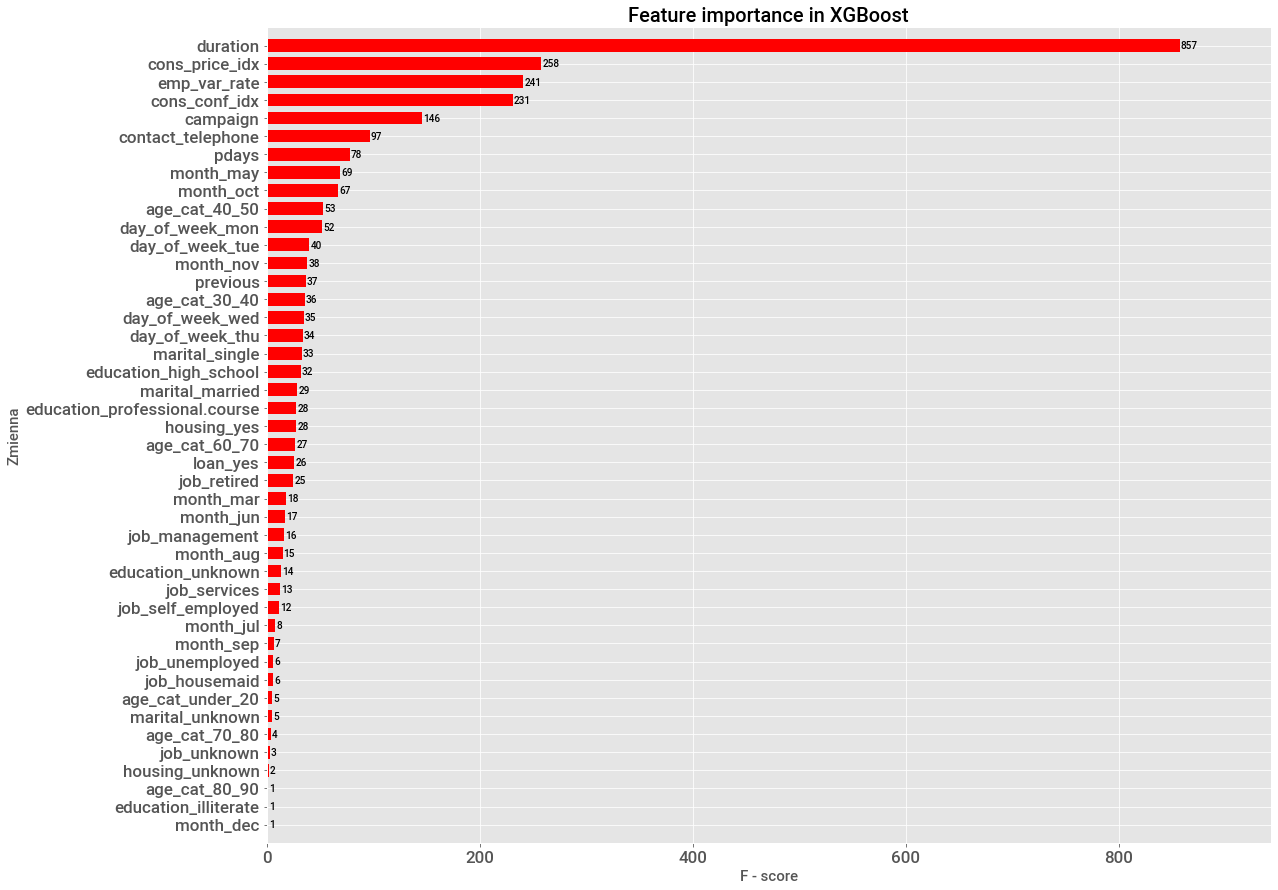

In [332]:
#Importance of variables in XGBoost model

#Size of plot
rcParams["figure.figsize"] = 18,15
#Parameters of plot
plot_importance(XGB, height=0.7, color="red")
plt.title("Feature importance in XGBoost", fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel("F - score", fontsize = 15)
plt.ylabel("Zmienna", fontsize = 15)
plt.show()

# 11. Comparision of models - XGBoost and Decision Tree

## 11.1 Data Frame with statistics of both models

In [358]:
#Statistics on test sets of models: Decision Tree and XGBoost

#Decision Tree - statistics on test dataset
accuracy_DT = accuracy_score(y_test_DT, TEST_pred_DT)
recall_DT = recall_score(y_test_DT, TEST_pred_DT)
precision_DT = precision_score(y_test_DT, TEST_pred_DT)
f1_DT = f1_score(y_test_DT, TEST_pred_DT)
AUC_DT = metrics.roc_auc_score(y_test_DT, DT.predict_proba(X_test_DT)[::,1])
Gini_DT = (2*AUC_DT) - 1

#XGBoost - statistics on test dataset
accuracy_XGB = accuracy_score(y_test_XGB, TEST_pred_XGB)
recall_XGB = recall_score(y_test_XGB, TEST_pred_XGB)
precision_XGB = precision_score(y_test_XGB, TEST_pred_XGB)
f1_XGB = f1_score(y_test_XGB, TEST_pred_XGB)
AUC_XGB = metrics.roc_auc_score(y_test_XGB, XGB.predict_proba(X_test_XGB)[::,1])
Gini_XGB = (2*AUC_XGB) - 1

#Data Frame with model statistics on test set for model comparison
statistics_comparision_df = pd.DataFrame()
statistics_comparision_df["Model"] = ["Drzewo Decyzyjne", "XGBoost"]
statistics_comparision_df["Accuracy"] = [accuracy_DT, accuracy_XGB]
statistics_comparision_df["Precision"] = [precision_DT, precision_XGB]
statistics_comparision_df["Recall"] = [recall_DT, recall_XGB]
statistics_comparision_df["F1"] = [f1_DT, f1_XGB]
statistics_comparision_df["AUC"] = [AUC_DT, AUC_XGB]
statistics_comparision_df["Gini"] = [Gini_DT, Gini_XGB]

#Add index and save Data Frame to Excel file
statistics_comparision_df.set_index("Model", inplace=True)
statistics_comparision_df.to_excel("Models_comparision/DF_statystyki.xlsx")
statistics_comparision_df

,Accuracy,Precision,Recall,F1,AUC,Gini
Model,,,,,,
Drzewo Decyzyjne,0.915389,0.539474,0.352436,0.426343,0.869608,0.739215
XGBoost,0.924676,0.662055,0.319656,0.431145,0.945012,0.890025


## 11.2 ROC curves with AUC metrics of both models

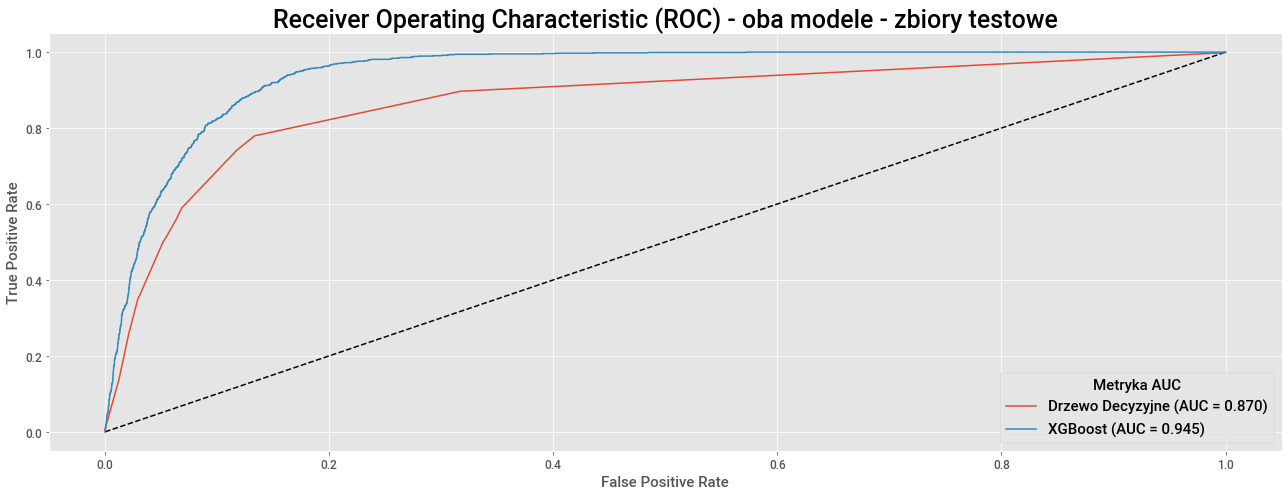

In [359]:
#Decision Tree - parameters for ROC
y_pred_prob1 = DT.predict_proba(X_test_DT)[:,1]
auc1 = metrics.roc_auc_score(y_test_DT, y_pred_prob1)
fpr1 , tpr1, thresholds1 = roc_curve(y_test_DT, y_pred_prob1)

#XGBoost - parameters for ROC
y_pred_prob2 = XGB.predict_proba(X_test_XGB)[:,1]
auc2 = metrics.roc_auc_score(y_test_XGB, y_pred_prob2)
fpr2 , tpr2, thresholds2 = roc_curve(y_test_XGB, y_pred_prob2)

#Size and parameters of plor
rcParams["figure.figsize"] = 18,7
plt.plot([0,1],[0,1], 'k--', color="black")
plt.plot(fpr1, tpr1, label= "Drzewo Decyzyjne" + " (AUC = %0.3f)" % auc1)
plt.plot(fpr2, tpr2, label= "XGBoost" + " (AUC = %0.3f)" % auc2)
#Axis
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) - oba modele - zbiory testowe", fontsize=25)
#Legend
plt.legend(loc="best",
           prop={"size": 15},
           title="Metryka AUC",
           title_fontsize="15",
           frameon=True)
#Save of plot
plt.savefig("Models_comparision/ROC_porownanie_modeli.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

# 12. Probabilities

In [360]:
#Calculating probabilities on a test set
prawdopodobienstwa = XGB.predict_proba(X_test_XGB)[:,:]*100
prawdopodobienstwa=pd.DataFrame(data = prawdopodobienstwa, 
                                columns=["Prawdopodobienstwo_0", "Prawdopodobienstwo_1"])
prawdopodobienstwa

,Prawdopodobienstwo_0,Prawdopodobienstwo_1
0,89.693275,10.306729
1,94.865089,5.134909
2,78.719521,21.280476
3,48.211964,51.788036
4,57.288563,42.711437
...,...,...
11731,96.903351,3.096653
11732,96.842583,3.157420
11733,94.378937,5.621063
11734,82.145859,17.854141


In [361]:
#Merge of target and independent variables from test dataset
zbior_testowy_xgb = pd.merge(X_test_XGB, y_test_XGB, left_index = True, right_index = True)
zbior_testowy_xgb.reset_index(inplace = True)
zbior_testowy_xgb

,index,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,job_housemaid,job_management,...,day_of_week_tue,day_of_week_wed,age_cat_30_40,age_cat_40_50,age_cat_60_70,age_cat_70_80,age_cat_80_90,age_cat_90_and_over,age_cat_under_20,y
0,406,348,1,999,0,-1.8,92.893,-46.2,0,0,...,1,0,1,0,0,0,0,0,0,0
1,29818,398,4,999,0,1.1,93.994,-36.4,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1472,128,1,999,0,-3.4,92.431,-26.9,0,0,...,0,0,0,0,1,0,0,0,0,0
3,33451,1068,1,999,0,1.4,94.465,-41.8,0,0,...,0,0,0,1,0,0,0,0,0,1
4,24597,1120,2,999,0,1.1,93.994,-36.4,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11731,8689,7,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,1,0,0,0,0,0,0,0
11732,33683,225,2,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,1,0,0,0,0,0,0
11733,17445,74,2,999,0,-1.8,93.075,-47.1,0,0,...,0,0,0,0,0,0,0,0,0,0
11734,32596,211,1,999,0,-1.8,93.075,-47.1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [362]:
#Merge probabilities and test set
prawdopodobienstwa_test_df = pd.merge(zbior_testowy_xgb, prawdopodobienstwa, left_index = True, right_index = True)
prawdopodobienstwa_test_df

,index,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,job_housemaid,job_management,...,age_cat_30_40,age_cat_40_50,age_cat_60_70,age_cat_70_80,age_cat_80_90,age_cat_90_and_over,age_cat_under_20,y,Prawdopodobienstwo_0,Prawdopodobienstwo_1
0,406,348,1,999,0,-1.8,92.893,-46.2,0,0,...,1,0,0,0,0,0,0,0,89.693275,10.306729
1,29818,398,4,999,0,1.1,93.994,-36.4,0,0,...,0,0,1,0,0,0,0,0,94.865089,5.134909
2,1472,128,1,999,0,-3.4,92.431,-26.9,0,0,...,0,0,1,0,0,0,0,0,78.719521,21.280476
3,33451,1068,1,999,0,1.4,94.465,-41.8,0,0,...,0,1,0,0,0,0,0,1,48.211964,51.788036
4,24597,1120,2,999,0,1.1,93.994,-36.4,0,0,...,1,0,0,0,0,0,0,1,57.288563,42.711437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11731,8689,7,1,999,0,1.1,93.994,-36.4,0,0,...,1,0,0,0,0,0,0,0,96.903351,3.096653
11732,33683,225,2,999,0,1.1,93.994,-36.4,0,0,...,0,1,0,0,0,0,0,0,96.842583,3.157420
11733,17445,74,2,999,0,-1.8,93.075,-47.1,0,0,...,0,0,0,0,0,0,0,0,94.378937,5.621063
11734,32596,211,1,999,0,-1.8,93.075,-47.1,0,0,...,1,0,0,0,0,0,0,0,82.145859,17.854141


In [393]:
#Displaying 10 % of clients with the highest probability of purchase
highest_prob_10_perc = int(11736 * 0.1)
prawdopodobienstwa_test_df.nlargest(highest_prob_10_perc, "Prawdopodobienstwo_1")

,index,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,job_housemaid,job_management,...,age_cat_30_40,age_cat_40_50,age_cat_60_70,age_cat_70_80,age_cat_80_90,age_cat_90_and_over,age_cat_under_20,y,Prawdopodobienstwo_0,Prawdopodobienstwo_1
10420,26910,171,1,999,0,-0.1,93.798,-40.4,0,0,...,1,0,0,0,0,0,0,1,25.331974,74.668030
11260,2354,154,1,999,0,-0.1,93.798,-40.4,0,0,...,1,0,0,0,0,0,0,1,25.381565,74.618439
6332,32126,667,1,999,0,-1.7,94.215,-40.3,0,0,...,0,0,0,0,0,0,0,1,25.940996,74.059006
3155,5544,544,1,999,0,-1.7,94.055,-39.8,0,0,...,0,0,0,1,0,0,0,1,26.050461,73.949539
7786,7944,586,2,999,0,-1.7,94.055,-39.8,0,0,...,0,0,0,0,0,0,0,1,27.660824,72.339180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,15246,192,1,999,1,-1.8,93.749,-34.6,0,0,...,0,0,0,0,0,0,0,1,65.195229,34.804771
9736,18106,747,1,999,0,-0.1,93.200,-42.0,0,0,...,1,0,0,0,0,0,0,0,65.231117,34.768883
2088,9235,681,1,999,0,1.4,93.918,-42.7,1,0,...,0,0,0,0,0,0,0,0,65.242912,34.757088
3914,16551,247,2,999,0,-2.9,92.963,-40.8,0,0,...,0,0,0,0,0,0,0,0,65.270195,34.729801


# 13. Conclusions

**General summary**<br>

The main target of this project was to build and evaluate models to choose clients to campaign and predict which client buy subscription. Then the best model was choosen based on statistics of classification model as well as visualization of ROC curves of each model on one plot with AUC score.<br>

Results of models may be overfitting because regardless of the algorithms chosen, hiper parameters tunning or data engineering techniques implement, dataset large enought is the most important for models, data are good quality data is more important than algorithms.<br>

**EDA (Exploratory Data Analysis) summary**<br>

The input dataset withour data engineering techniques contained: 41188 observations as well as 21 variables. EDA was performed among others by Pandas Profiling and Sweetviz reports. By doing so variables: age, job and education have been subjected to feature engineering. In terms of target variable distribution of this variable was checked (dataset is not balanced, but situation is not really bad). Oversampling was not performed but in this situation (not balanced dataset) it is relevant to avoid accuracy statistics in models evaluation to avoid falling into the accuracy paradox trap.<br>

Then EDA (after Features Engineering) of categorical and numerical variables were performed on plots.<br> 

Furthermore, in terms of categorical variables dummy coding was performed. Then correlation between target variable and independent variables and between independent variables was calculated using Spearman coefficient because in contrast to the Pearson coefficient, the Spearman coefficient does not require a normal distribution of variables. <br>

Features selection was made using Forward method. Then was build function to accelerate modelling.<br>

**Models bulding**<br>

Two models were built: Decision Tree and XGBoost. Each model were build after tunning of hyperparameters in classifier and in train test split so as to find both the best parameters of classifier and the best configuration of train test split. Tunning of hiper parameters was performed by using loop which created different combinations of all choosen classifier parameters so as to achieve best AUC on test dataset and also simmilar AUC result on train and test datasets. Tunning of train test split was performed in each model by loop.<br>

Each model was evaluated by: confusion matrix, classification report, ROC curve, AUC, Accuracy, Precision, Recall, F1, Gini. Moreover in each model was performed comparision of results on train and test dataset to eventually detect overfitting. Moveorver 2 plots for easy business interpretaion was plot from each model: PROFIT, LIFT.<br>

Accuracy is similar on both models but as was mentioned before dataset is unbalanced and no over/under sampling has been done so as not to fall into the trap of the accuracy paradox this statistic should be omitted in the model comparison. The rest of the statistics strongly support the XGBoost model.<br>

Of course, as was mentioned at the begining because of small dataset results coudl be overfitted. Regardless of the algorithms used, the more important thing is the data, and more specifically the quality and quantity of the data, which is not necessarily possible with data only for learning.